# PCA and K-Means Clustering

In this notebook, we'll use PCA to reduce the dimensionality of the data and (hopefully) get better results than just using K-Means.

## Imports and housekeeping

In [32]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Setting for full table display
pd.set_option('display.max_columns', None)

In [33]:
# Import data
df = pd.read_csv('data/feature_engineered_data.csv')

# print the first few rows to confirm the data has been loaded correctly
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,EducationOrdinalEncoded,Relationship_InRelationship,Relationship_NotInRelationship,Relationship_Undefined,ChildrenHome,RegencyInMonths,TotalSpent,DealSeeker,BuyerType_CatalogueBuyer,BuyerType_MixedBuyer,BuyerType_StoreBuyer,BuyerType_WebBuyer,VisitedWebsiteRecently,AcceptedOffer
0,58138,58,635,88,546,172,88,88,3,8,10,4,7,57,2,0,1,0,0,32,1617,1,1,0,0,0,1,1
1,46344,38,11,1,6,2,1,6,2,1,1,2,5,60,2,0,1,0,1,5,27,0,0,0,1,0,1,0
2,71613,26,426,49,127,111,21,42,1,8,2,10,4,49,2,1,0,0,0,16,776,0,0,0,1,0,1,0
3,26646,26,11,4,20,10,3,5,2,2,0,4,6,30,2,1,0,0,1,3,53,0,0,0,1,0,1,0
4,58293,94,173,43,118,46,27,15,5,5,3,6,5,33,5,1,0,0,1,11,422,1,0,0,1,0,1,0


In [34]:
# Copy data
df_use = df.copy()

## Standardise

In [35]:
# Scaling of continuous features
continuous_features = ['Income',
                       'Recency',
                       'MntWines',
                       'MntFruits',
                       'MntMeatProducts',
                       'MntFishProducts',
                       'MntSweetProducts',
                       'MntGoldProds',
                       'NumDealsPurchases',
                       'NumWebPurchases',
                       'NumCatalogPurchases',
                       'NumStorePurchases',
                       'NumWebVisitsMonth',
                       'Age',
                       'RegencyInMonths',
                       'TotalSpent']

# Separate binary features
continuous_data = df[continuous_features]
binary_ord_data = df.drop(continuous_features, axis=1)

In [36]:
continuous_data

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,RegencyInMonths,TotalSpent
0,58138,58,635,88,546,172,88,88,3,8,10,4,7,57,32,1617
1,46344,38,11,1,6,2,1,6,2,1,1,2,5,60,5,27
2,71613,26,426,49,127,111,21,42,1,8,2,10,4,49,16,776
3,26646,26,11,4,20,10,3,5,2,2,0,4,6,30,3,53
4,58293,94,173,43,118,46,27,15,5,5,3,6,5,33,11,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,61223,46,709,43,182,42,118,247,2,9,3,4,5,47,18,1341
2232,64014,56,406,0,30,0,0,8,7,8,2,5,7,68,3,444
2233,56981,91,908,48,217,32,12,24,1,2,3,13,6,33,11,1241
2234,69245,8,428,30,214,80,30,61,2,6,5,10,3,58,11,843


In [37]:
"""
# Remove the specific product categories
remove_columns = ['MntWines',
                  'MntFruits',
                  'MntMeatProducts',
                  'MntFishProducts',
                  'MntSweetProducts',
                  'MntGoldProds']
continuous_data = continuous_data.drop(remove_columns, axis=1)
"""

"\n# Remove the specific product categories\nremove_columns = ['MntWines',\n                  'MntFruits',\n                  'MntMeatProducts',\n                  'MntFishProducts',\n                  'MntSweetProducts',\n                  'MntGoldProds']\ncontinuous_data = continuous_data.drop(remove_columns, axis=1)\n"

In [38]:
# Standardize continuous features using RobustScaler
scaler_continuous = RobustScaler()
scaled_continuous_data = scaler_continuous.fit_transform(continuous_data)

# Combined data
final_scaled_data = np.concatenate([scaled_continuous_data, binary_ord_data], axis=1)

In [39]:
final_scaled_data

array([[ 0.20420617,  0.18      ,  0.95991671, ...,  0.        ,
         1.        ,  1.        ],
       [-0.15566049, -0.22      , -0.33940656, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.61536466, -0.46      ,  0.5247267 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.16890299,  0.84      ,  1.52837064, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.54311062, -0.82      ,  0.5288912 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.04343481, -0.18      , -0.18740239, ...,  0.        ,
         1.        ,  1.        ]])

## PCA

In [40]:
# Apply PCA
n_components = final_scaled_data.shape[1]
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(final_scaled_data)

([<matplotlib.axis.XTick at 0x7fcb27129b20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

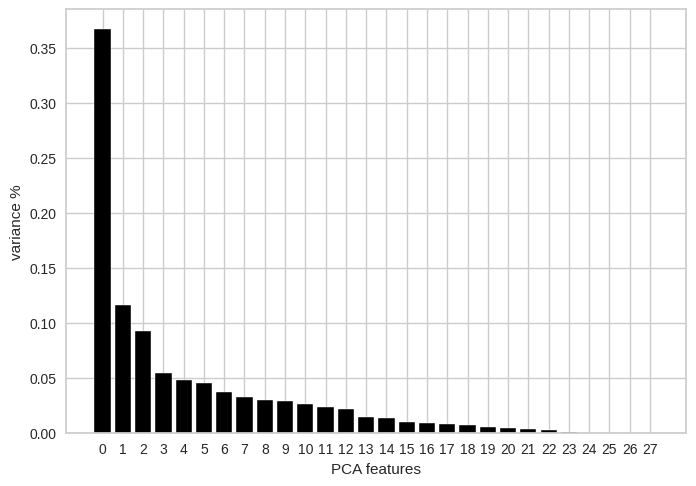

In [41]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

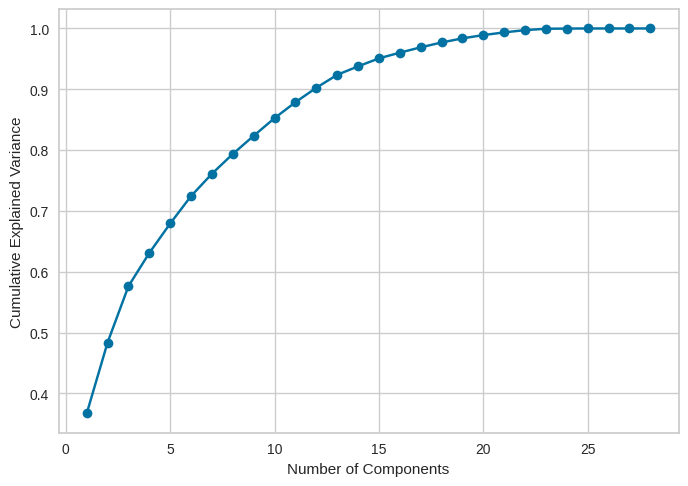

In [42]:
# Plot explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [43]:
# Get feature names
feature_names = continuous_features + list(binary_ord_data.columns)

# Loop through each principal component and find the most important features
for i, component in enumerate(pca.components_[:n_components]):
    # Sort the indices of features based on their absolute weights in the component
    top_feature_indices = np.argsort(np.abs(component))[::-1]

    # Get the names of the top features
    top_feature_names = [feature_names[idx] for idx in top_feature_indices]

    print(f"Principal Component {i+1} - Explained Variance: {pca.explained_variance_ratio_[i]:.4f}")
    print("Top Features:", top_feature_names)
    print()

Principal Component 1 - Explained Variance: 0.3671
Top Features: ['MntSweetProducts', 'MntFruits', 'MntFishProducts', 'MntMeatProducts', 'MntGoldProds', 'NumCatalogPurchases', 'TotalSpent', 'Income', 'MntWines', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumWebPurchases', 'ChildrenHome', 'NumDealsPurchases', 'AcceptedOffer', 'EducationOrdinalEncoded', 'BuyerType_CatalogueBuyer', 'RegencyInMonths', 'DealSeeker', 'Age', 'BuyerType_StoreBuyer', 'BuyerType_MixedBuyer', 'Relationship_InRelationship', 'Relationship_NotInRelationship', 'Recency', 'VisitedWebsiteRecently', 'BuyerType_WebBuyer', 'Relationship_Undefined']

Principal Component 2 - Explained Variance: 0.1167
Top Features: ['EducationOrdinalEncoded', 'MntWines', 'Income', 'Age', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases', 'MntFruits', 'NumDealsPurchases', 'TotalSpent', 'MntMeatProducts', 'NumStorePurchases', 'MntFishProducts', 'MntGoldProds', 'AcceptedOffer', 'DealSeeker', 'NumWebVisitsMonth', 'BuyerType_StoreBuye

In [44]:
# Select the Number of Components
threshold = 0.80  # 80% of the variance will be maintained 
selected_components = np.argmax(cumulative_explained_variance >= threshold) + 1

In [45]:
print(selected_components)

9


## Use K-Means

In [46]:
# Select 9 components 
selected_components = principal_components[:, :9]

### Eblow method

In [47]:
from yellowbrick.cluster import KElbowVisualizer

In [48]:
# Instantiate the KMeans model
elb_kmeans = KMeans(random_state=13)

In [49]:
# Use the KElbowVisualizer for the elbow method
elbow_visualizer = KElbowVisualizer(elb_kmeans, k=(1, 10))

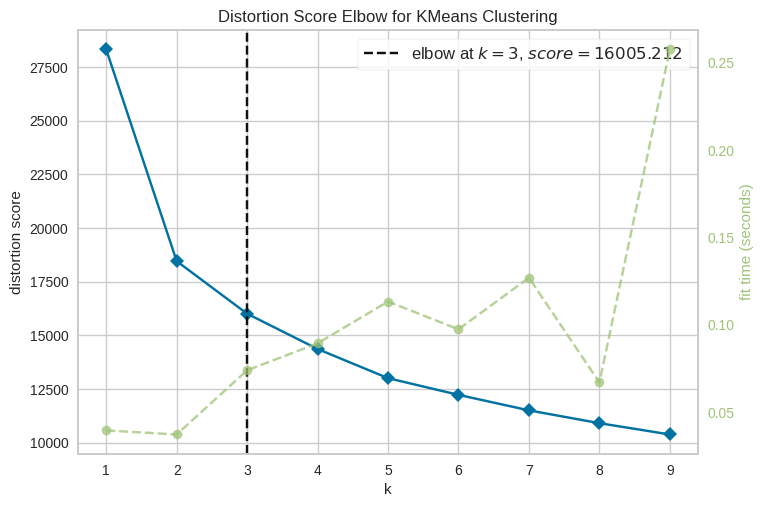

In [50]:
# Fit the visualizer to the data
elbow_visualizer.fit(selected_components)

# Visualize the elbow method result
elbow_visualizer.show()
plt.show()

### Silhouette Method

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer

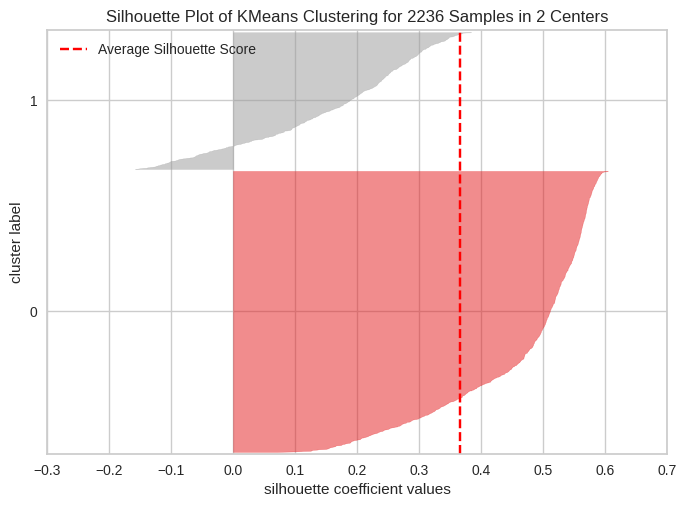

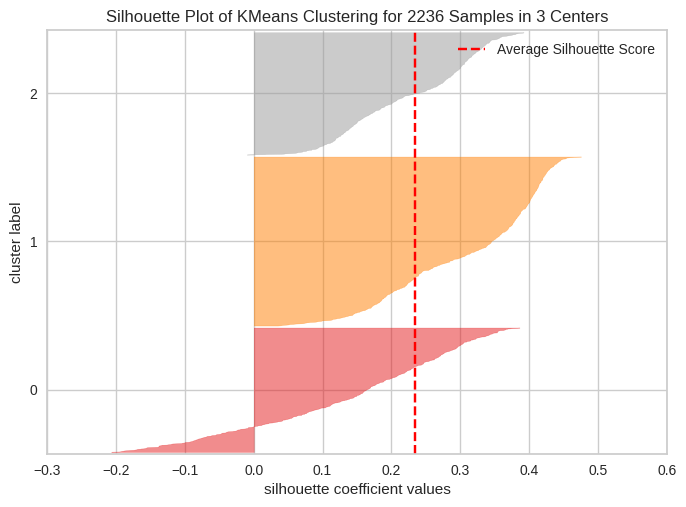

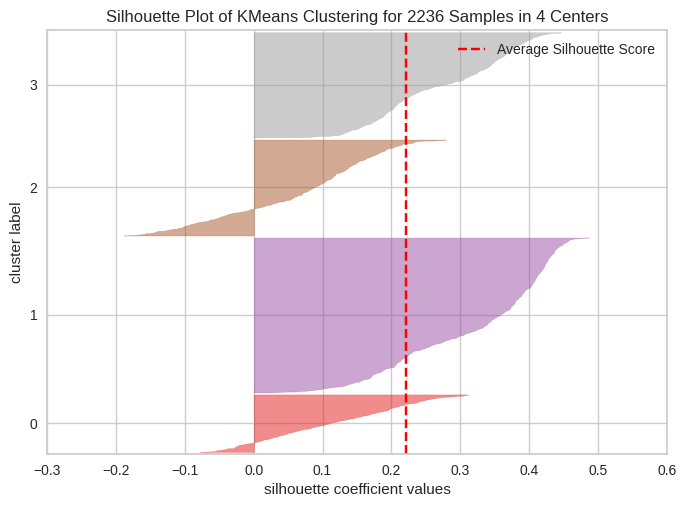

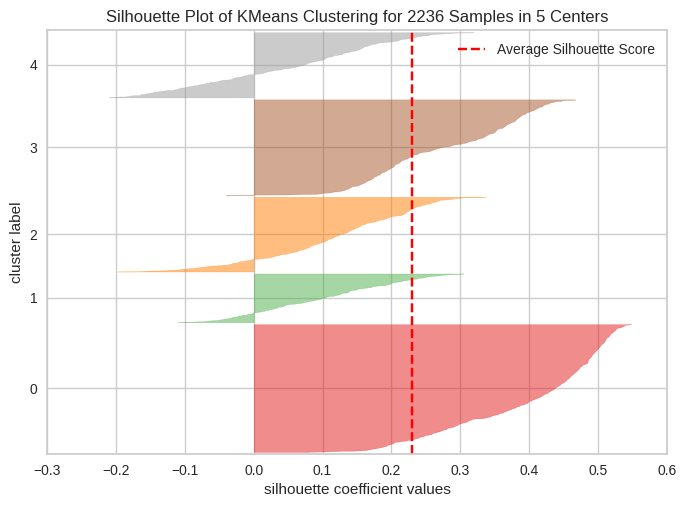

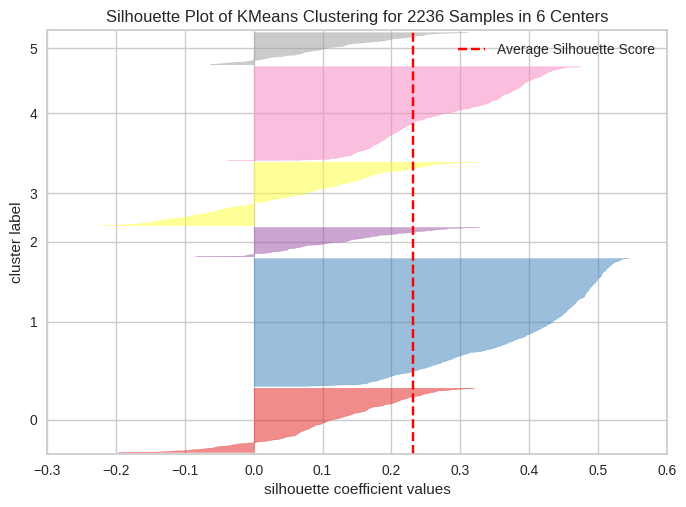

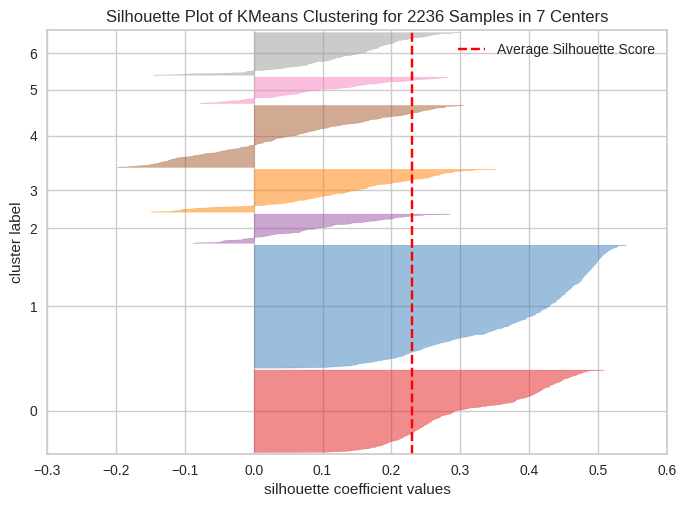

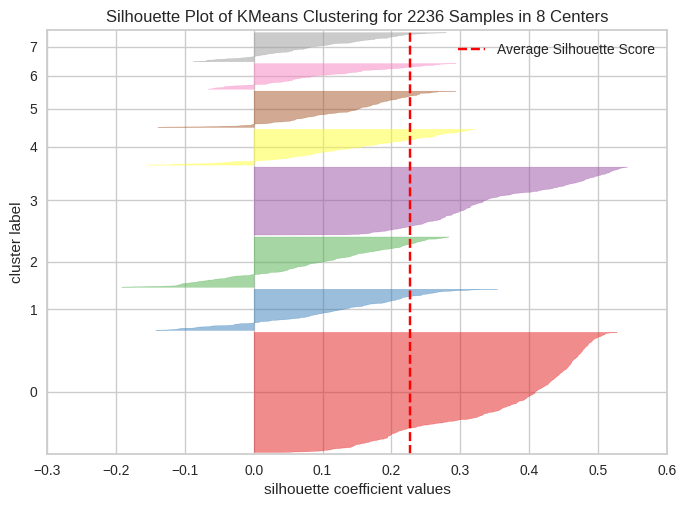

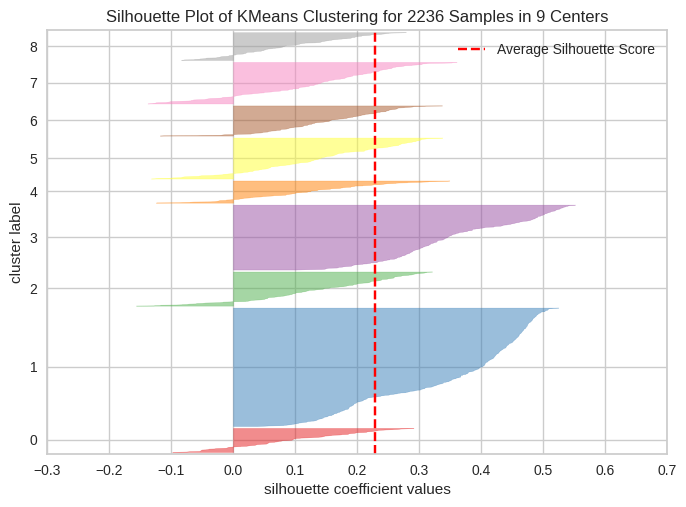

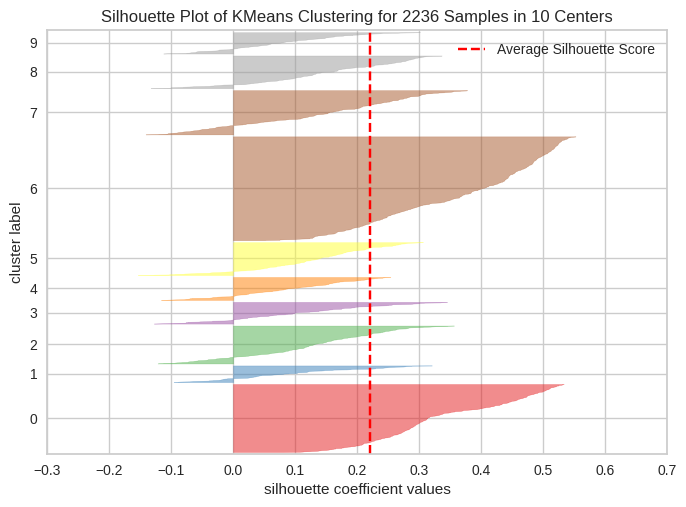

In [52]:
def plot_silhouette(data, k_range=(2, 10)):
    """
    Plot Silhouette scores for different values of k.

    Parameters:
    - data: numpy array or pandas DataFrame, input data for clustering
    - k_range: tuple, range of k values to consider (default is 2 to 10)

    Returns:
    - best_k: int, the optimal number of clusters
    """
    best_score = -1  # Initialize with a value lower than any possible silhouette score
    best_k = None
    best_visualizer = None

    for k in range(k_range[0], k_range[1] + 1):
        # Instantiate the KMeans model
        silo_kmeans = KMeans(n_clusters=k)

        # Use the SilhouetteVisualizer for the Silhouette method
        visualizer = SilhouetteVisualizer(silo_kmeans)

        # Fit the visualizer to the data
        visualizer.fit(data)

        # Get the average silhouette score
        avg_score = visualizer.silhouette_score_

        # Visualize the Silhouette method result
        visualizer.show()

        # Check if this iteration has a higher silhouette score
        if avg_score > best_score:
            best_score = avg_score
            best_k = k
            best_visualizer = visualizer

    # Return the optimal number of clusters
    return best_k

# Use the function to plot silhouette scores and get the best visualizer
optimal_k = plot_silhouette(selected_components, k_range=(2, 10))

In [53]:
print(optimal_k)

2


The silhouette is somewhat inconclusive, elbow method shows 3 as the best groping see we'll go with that.

## Visualise outcome

In [54]:
# Instantiate the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3)
# Fit the model to the data
kmeans.fit(selected_components)
# Get cluster assignments for each data point
labels = kmeans.labels_
# Add the cluster labels to your DataFrame
df['cluster'] = labels

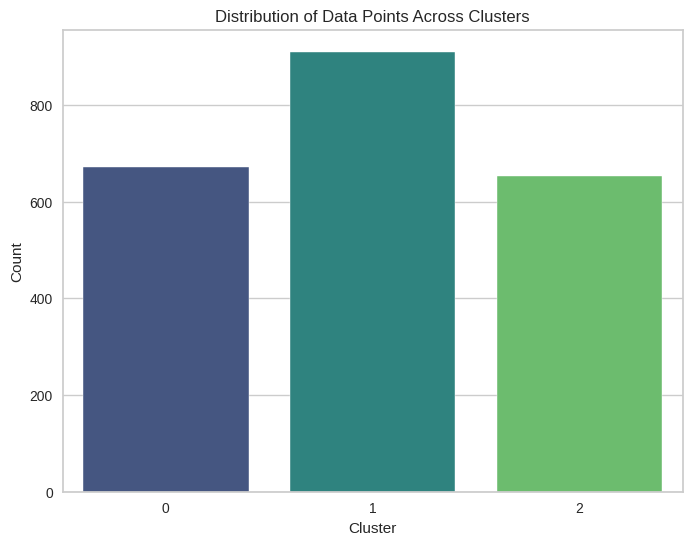

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df, palette='viridis')
plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

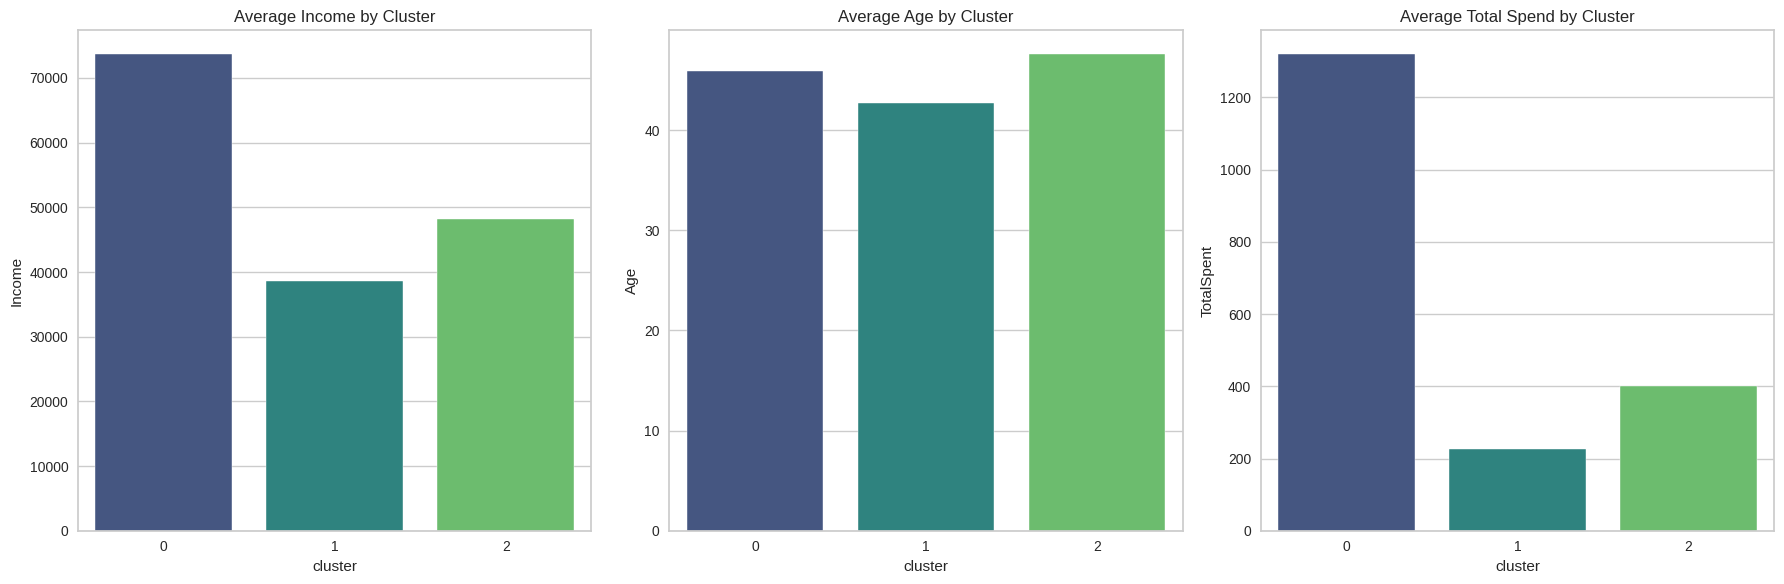

In [56]:
# Calculate average income, average age, and average total spend for each cluster
cluster_summary = df.groupby('cluster').agg({
    'Income': 'mean',
    'Age': 'mean',
    'TotalSpent': 'mean'
}).reset_index()

# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot average income
sns.barplot(x='cluster', y='Income', data=cluster_summary, ax=axes[0], palette='viridis')
axes[0].set_title('Average Income by Cluster')

# Plot average age
sns.barplot(x='cluster', y='Age', data=cluster_summary, ax=axes[1], palette='viridis')
axes[1].set_title('Average Age by Cluster')

# Plot average total spend
sns.barplot(x='cluster', y='TotalSpent', data=cluster_summary, ax=axes[2], palette='viridis')
axes[2].set_title('Average Total Spend by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()


In [57]:
df['cluster'].value_counts()

1    910
0    672
2    654
Name: cluster, dtype: int64

On initial look, even with PCA, the clusters are almost identical.

### Drilling down

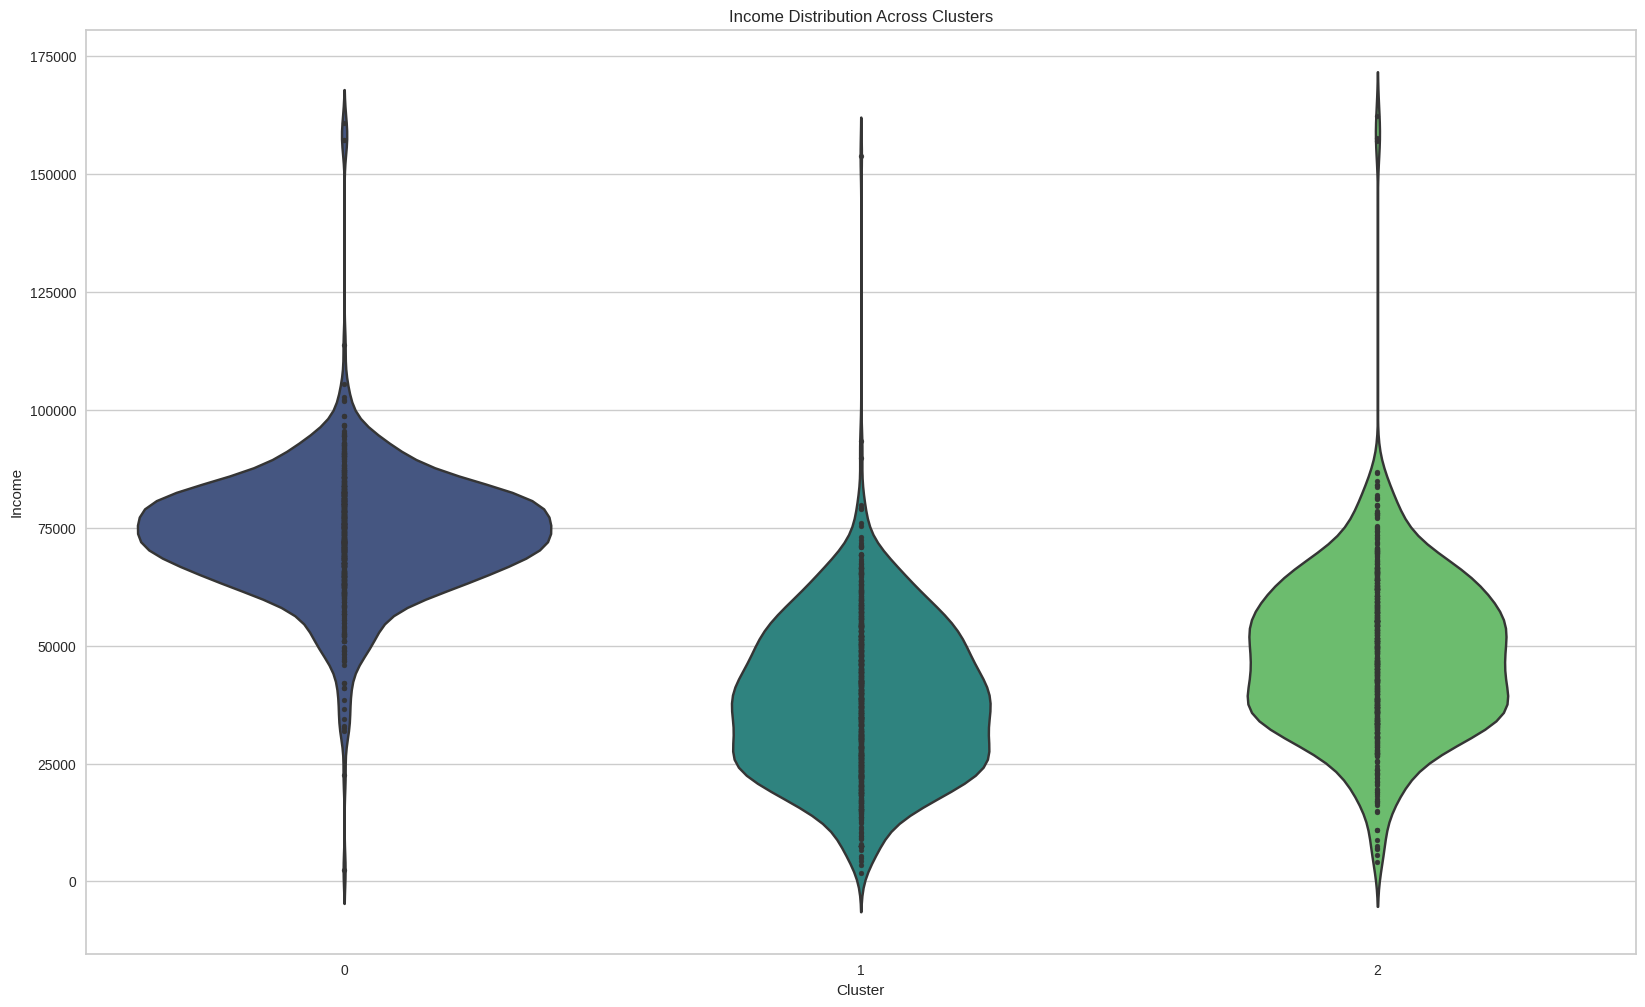

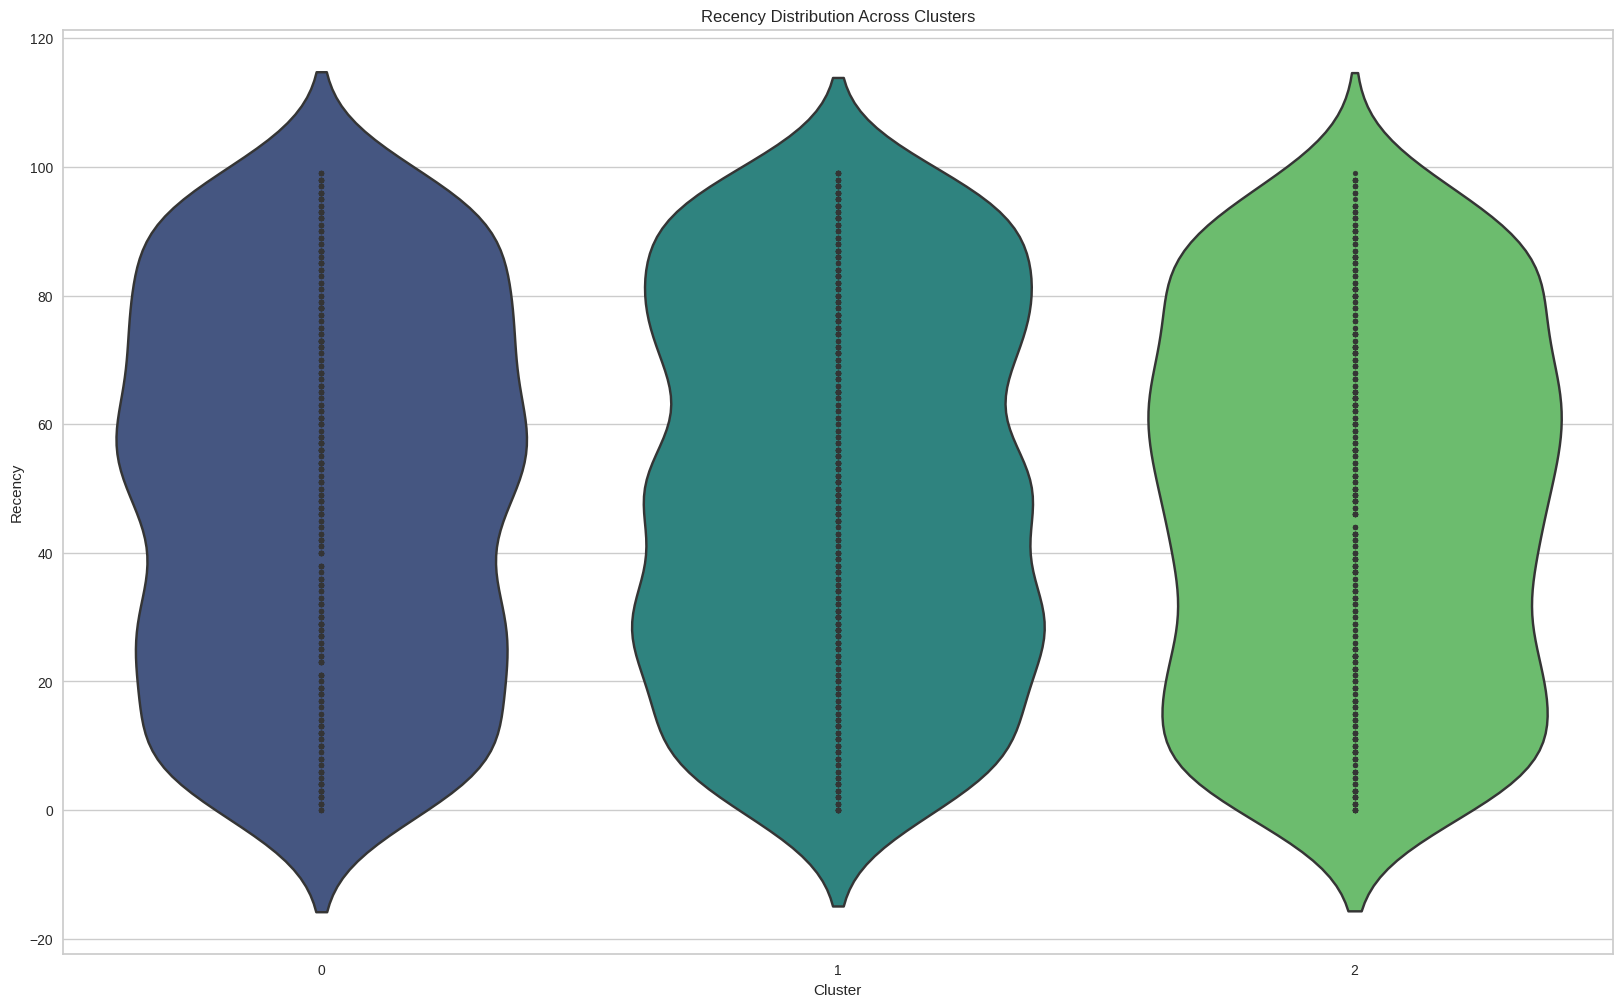

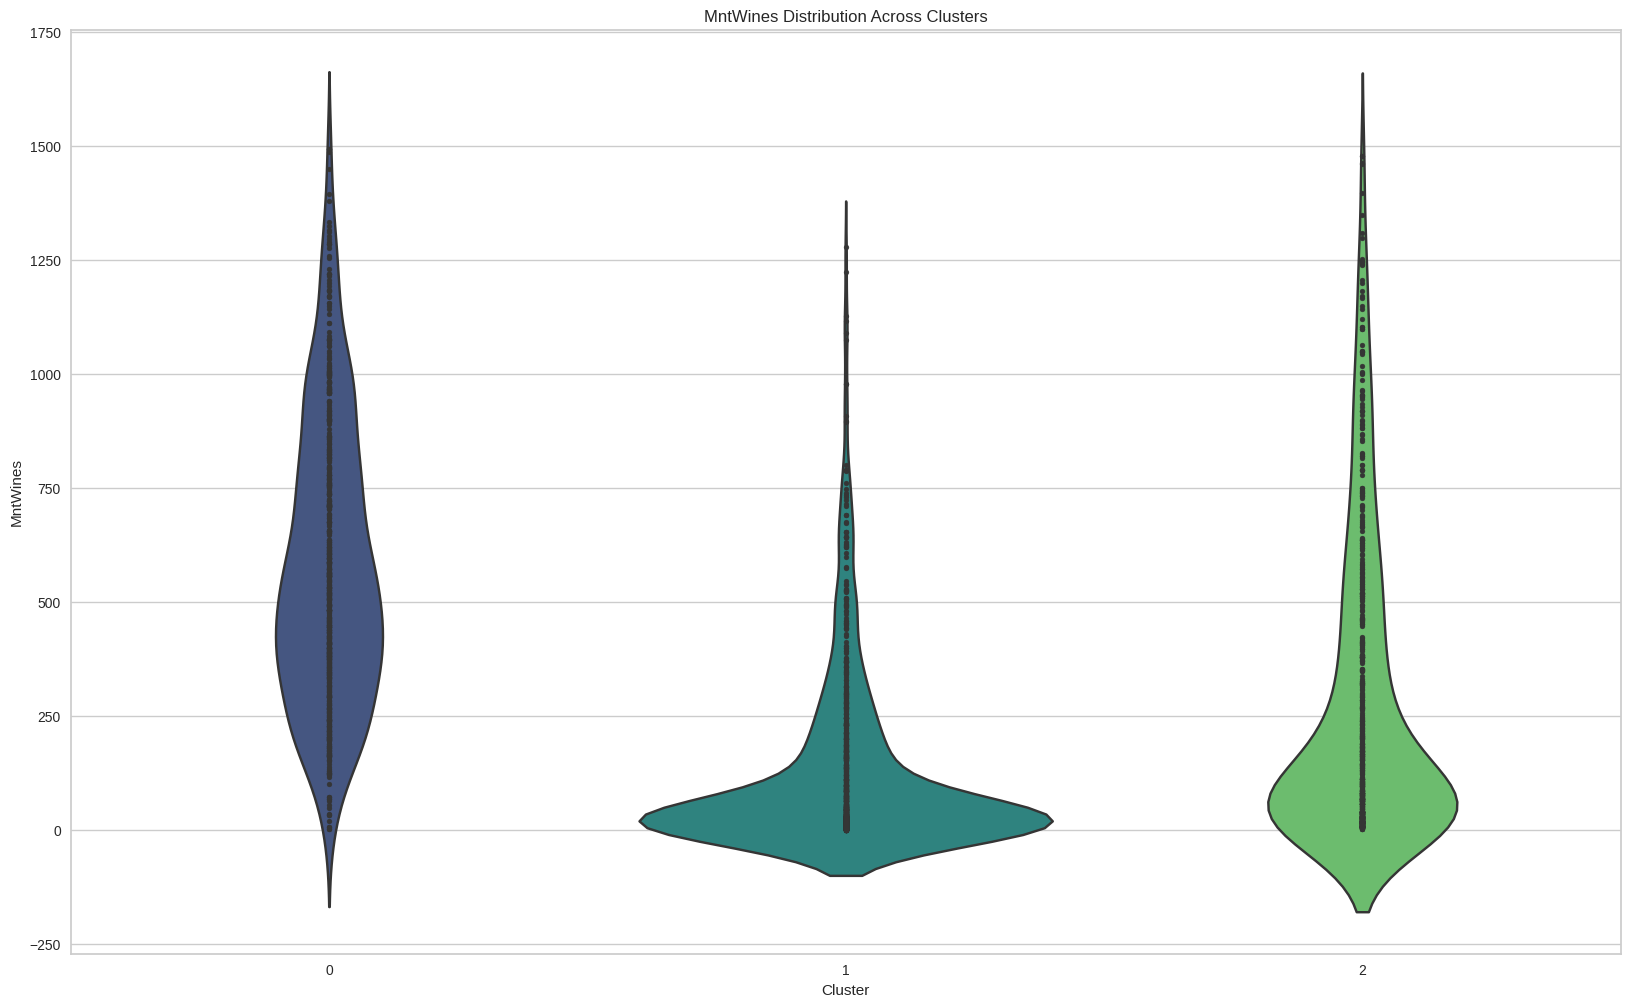

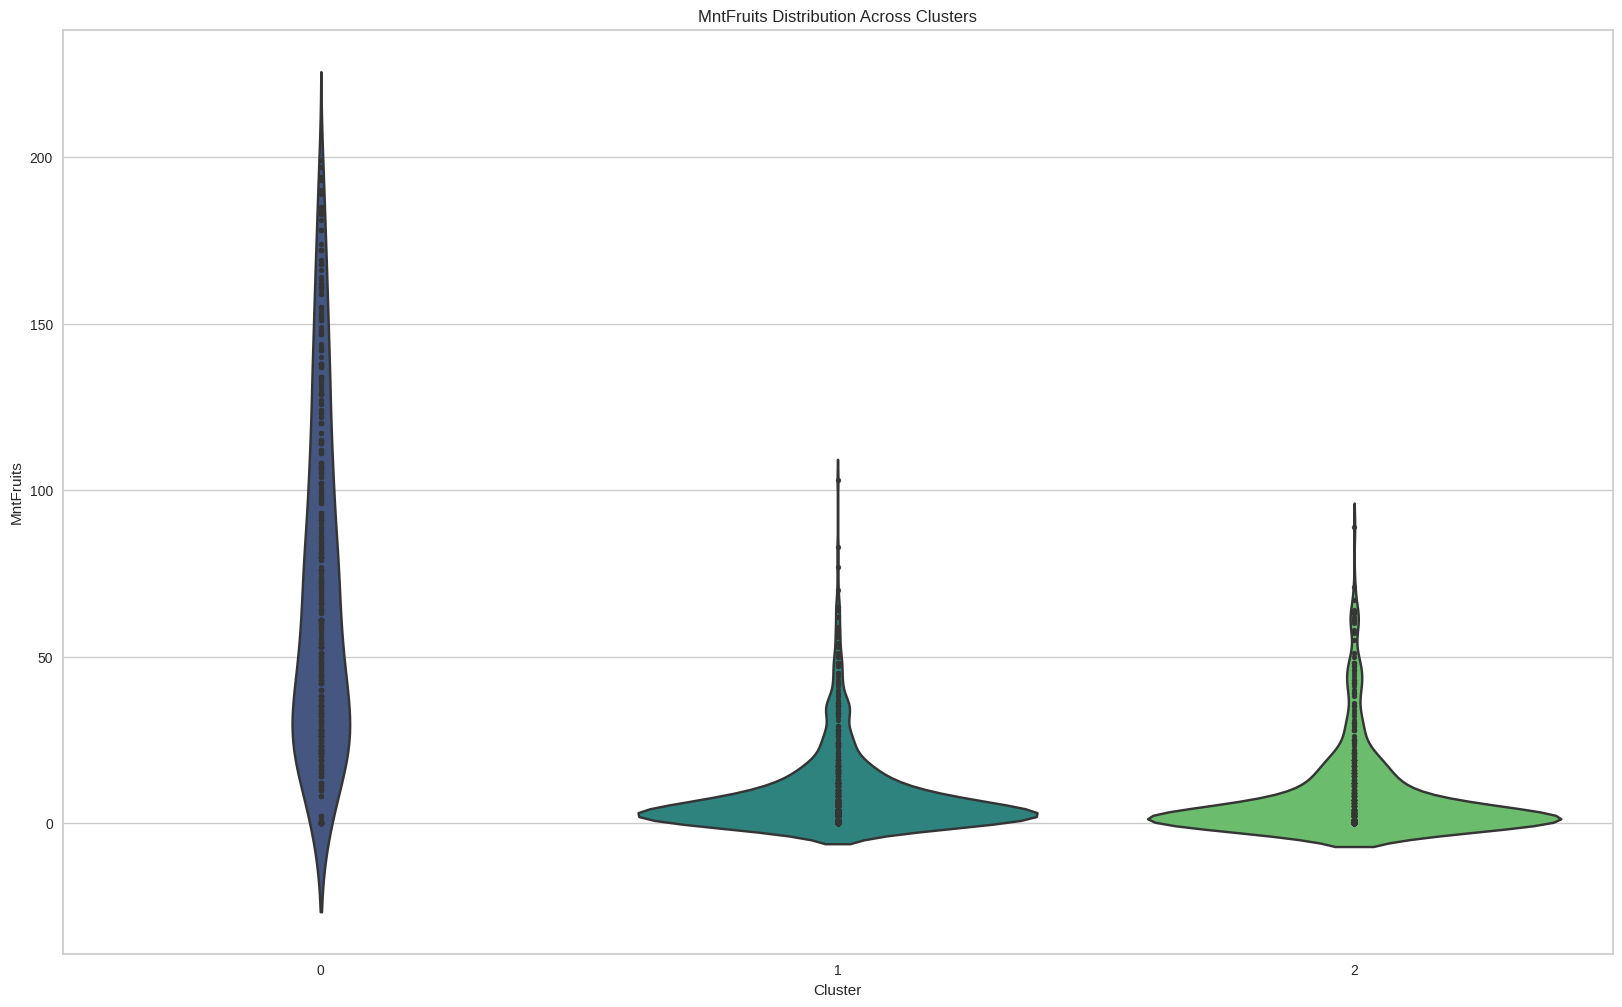

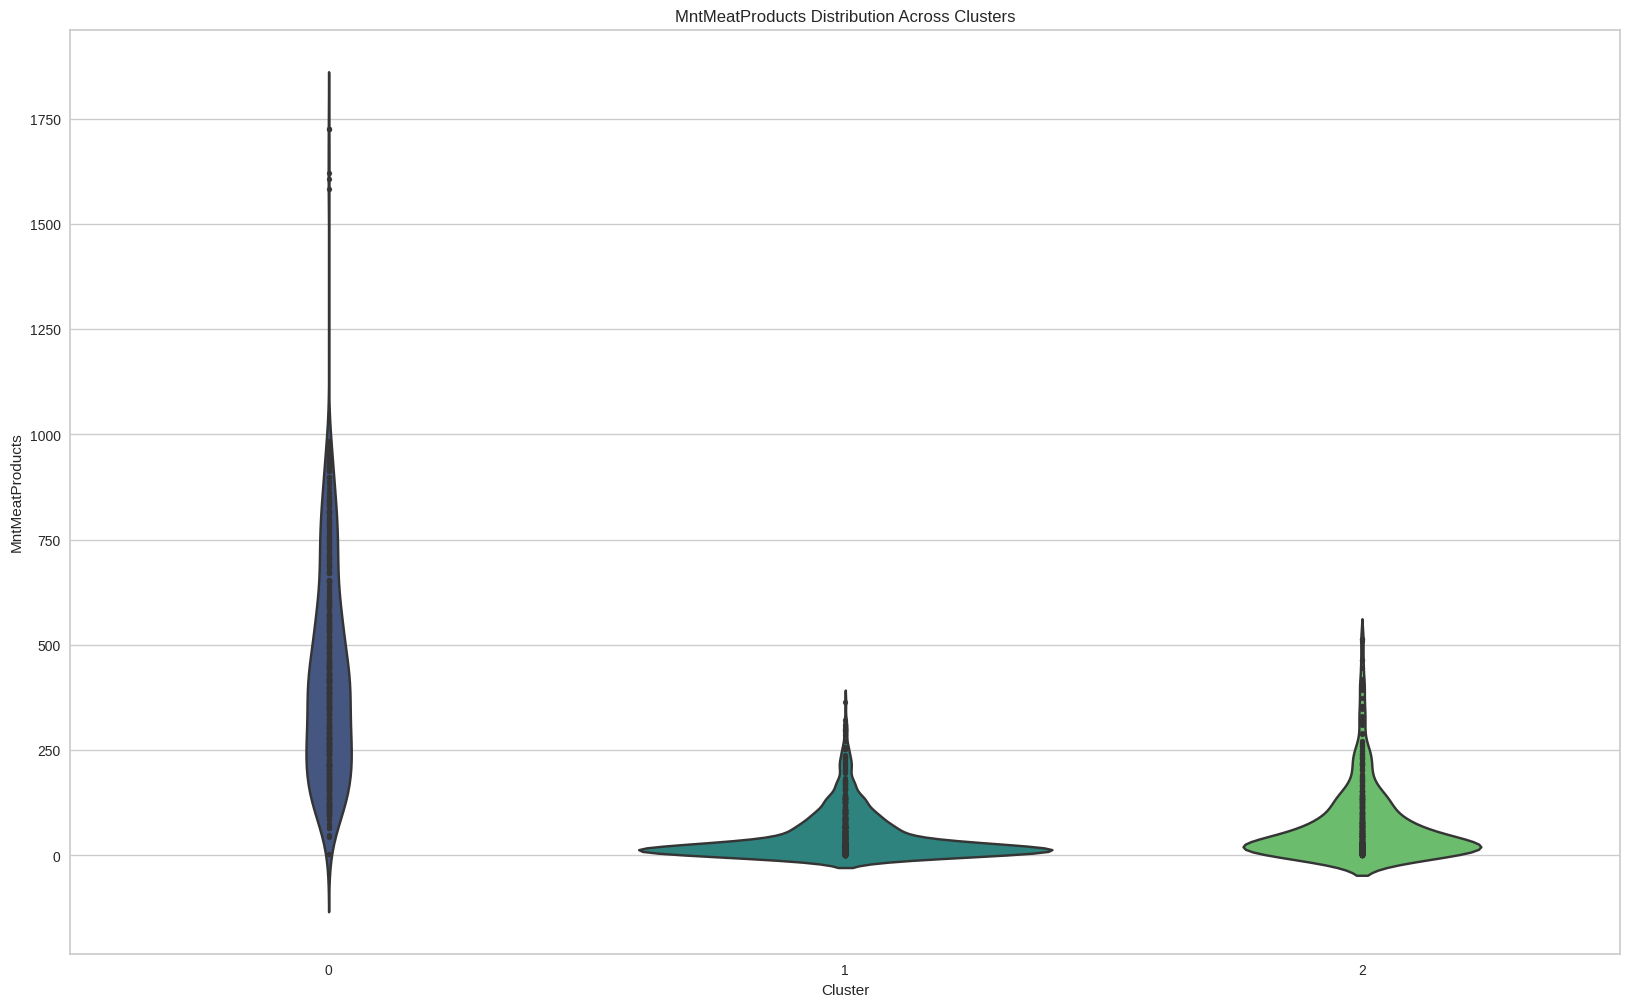

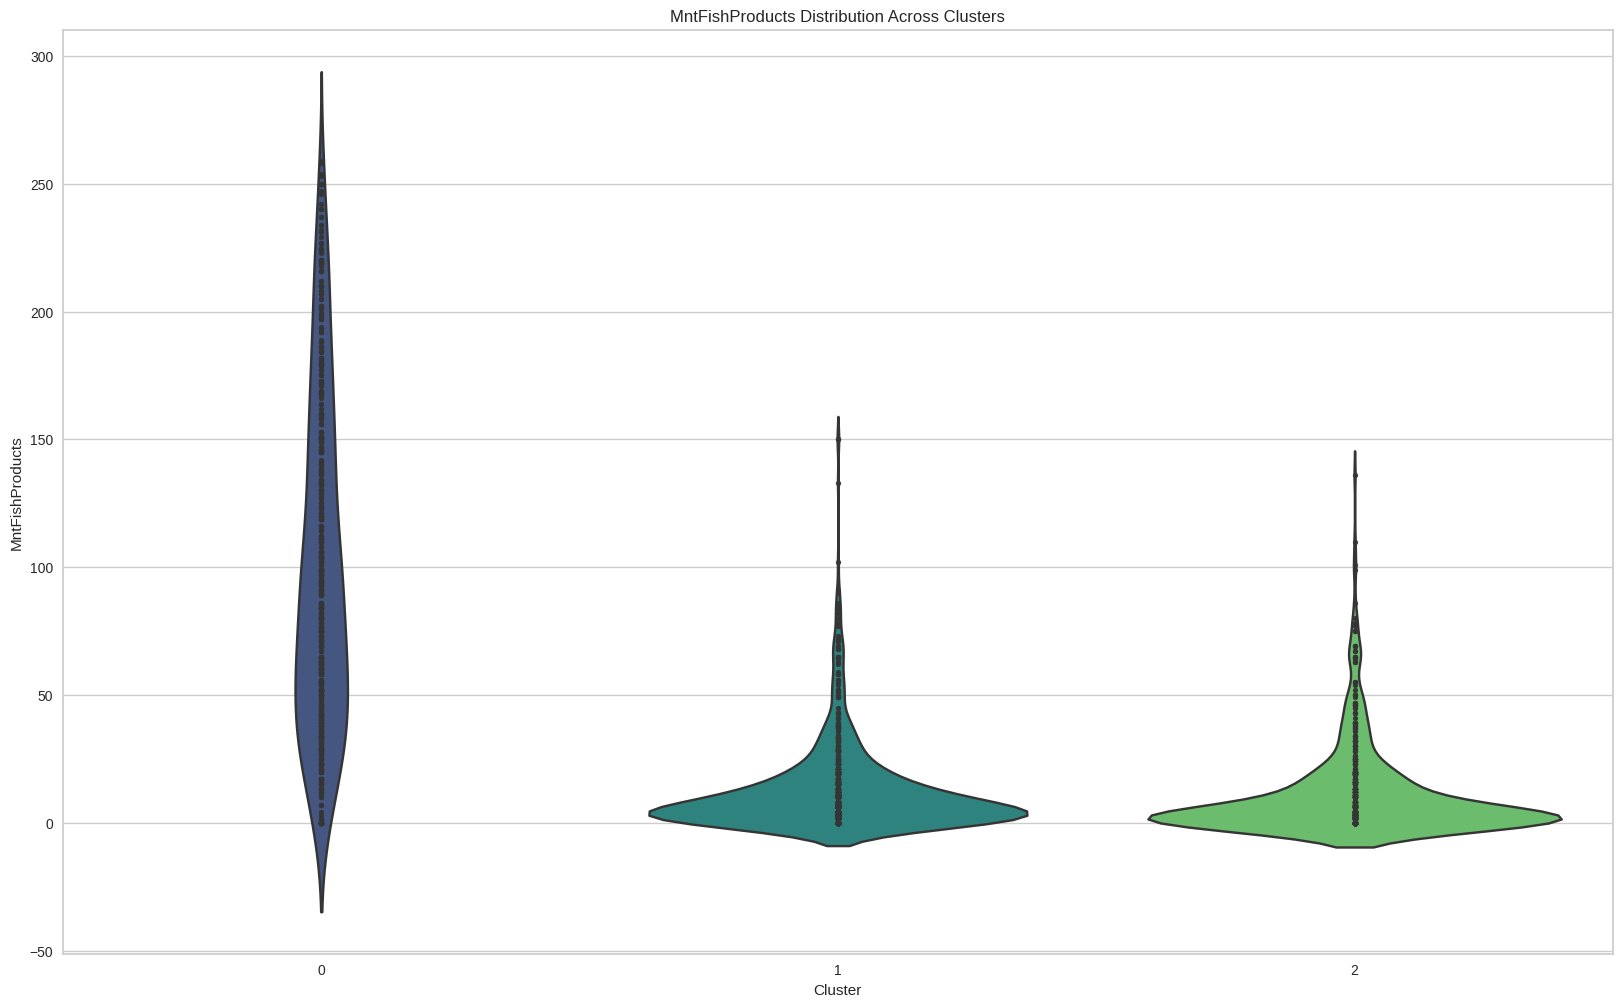

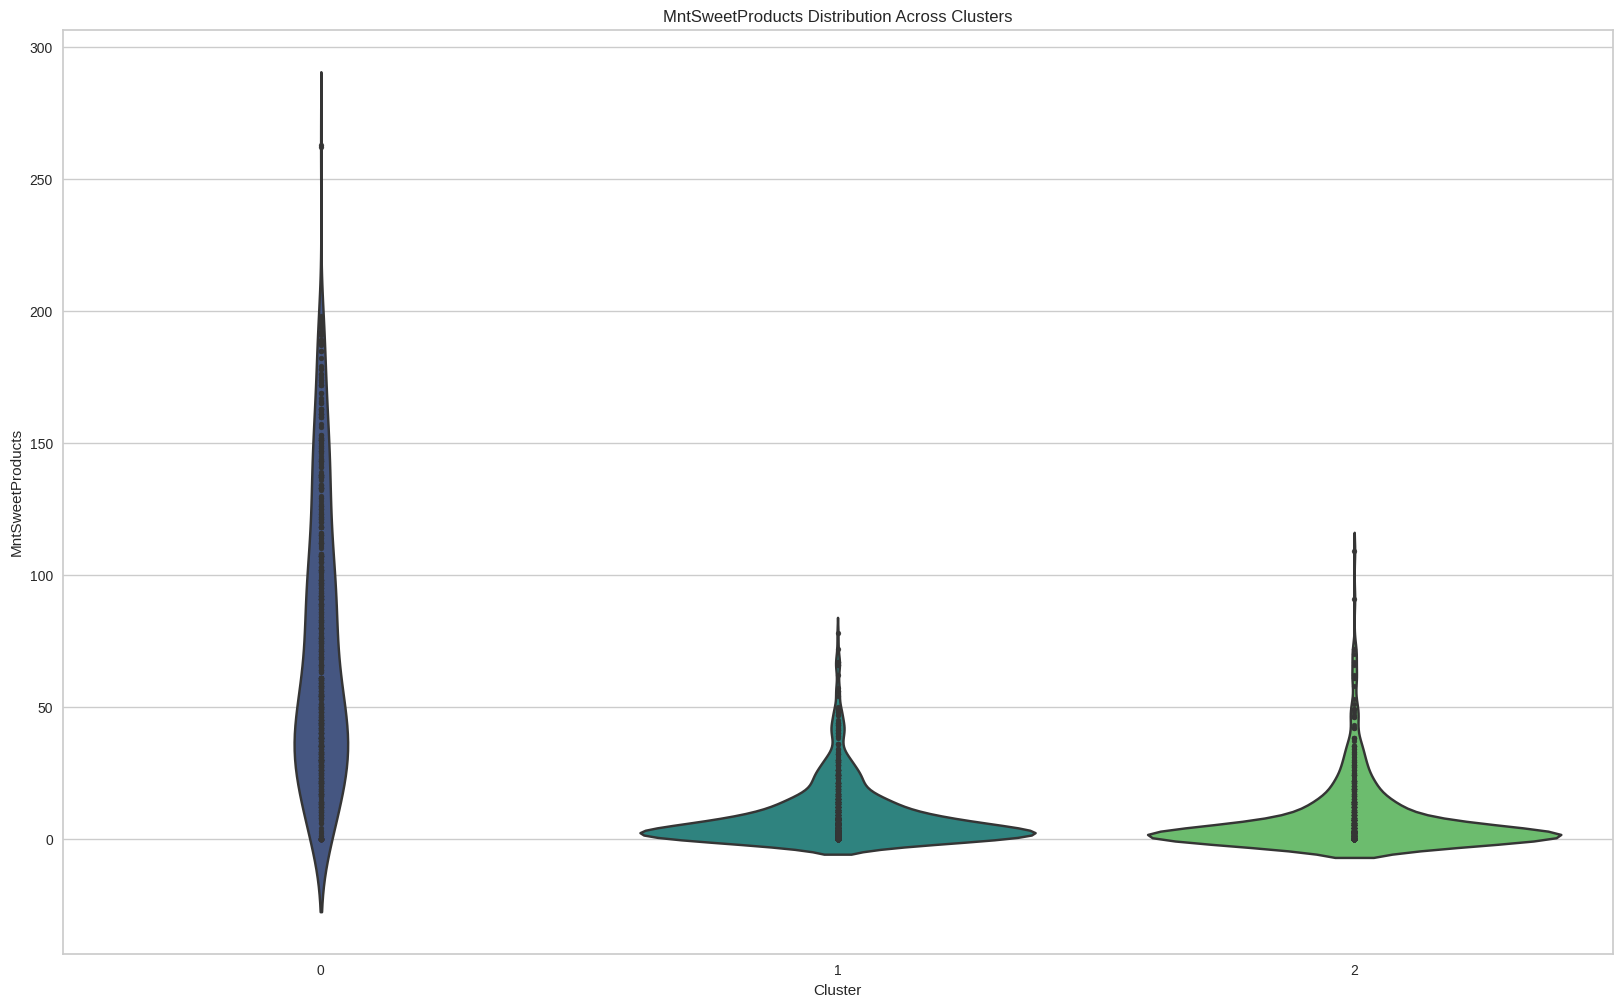

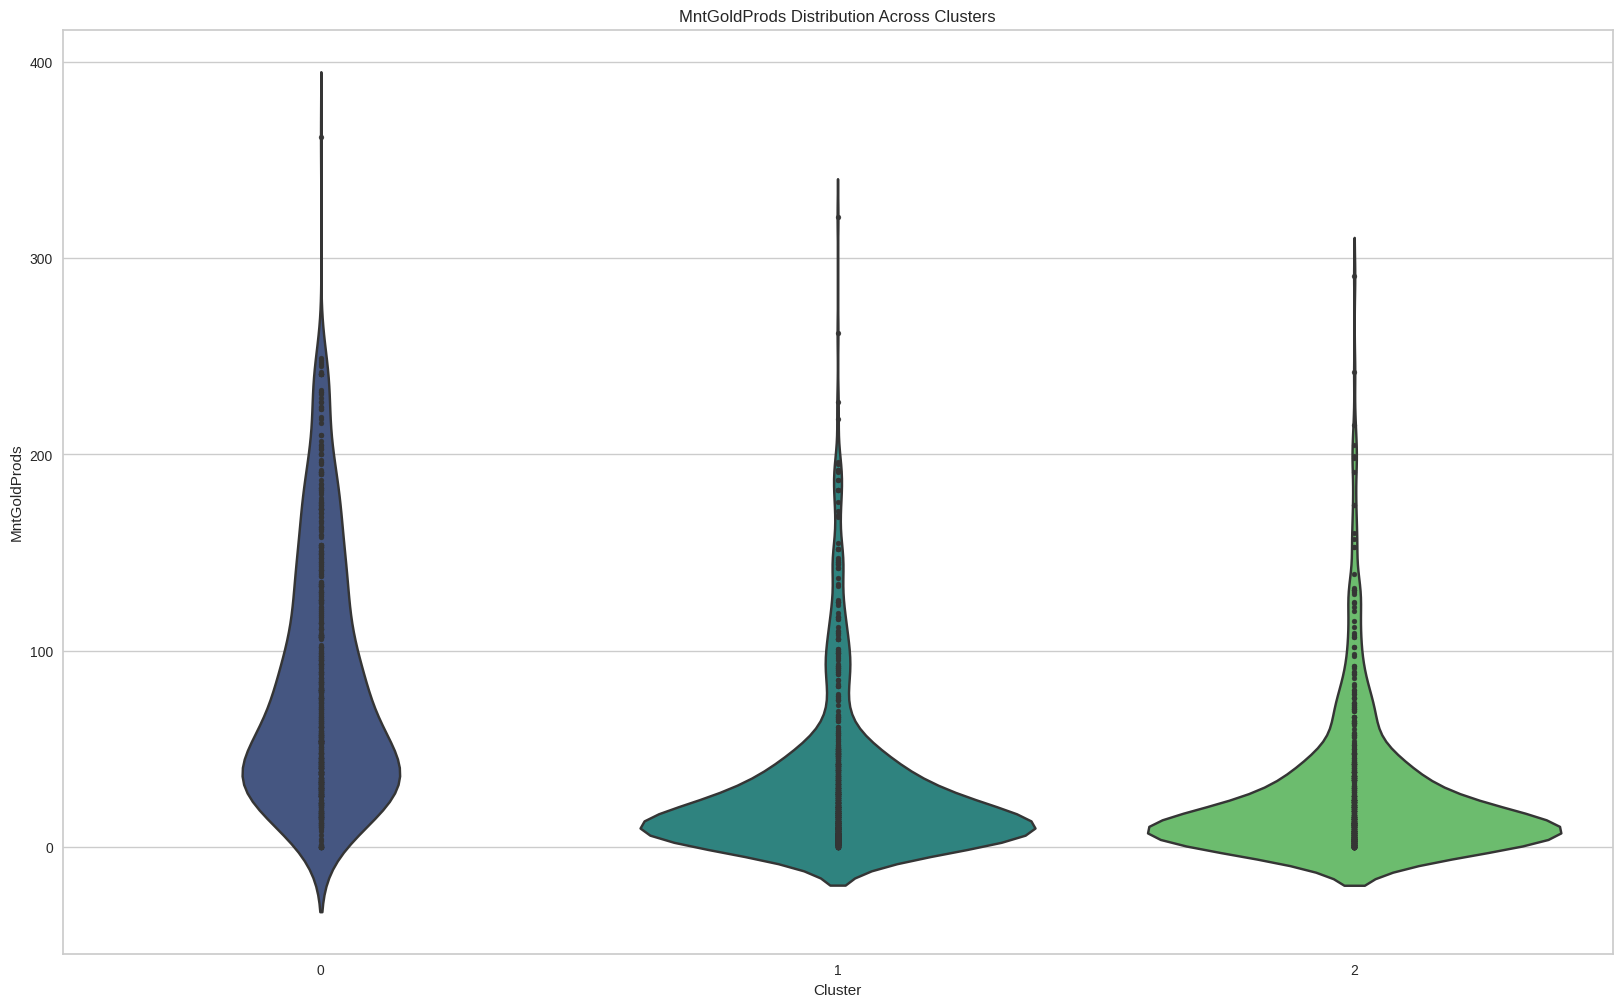

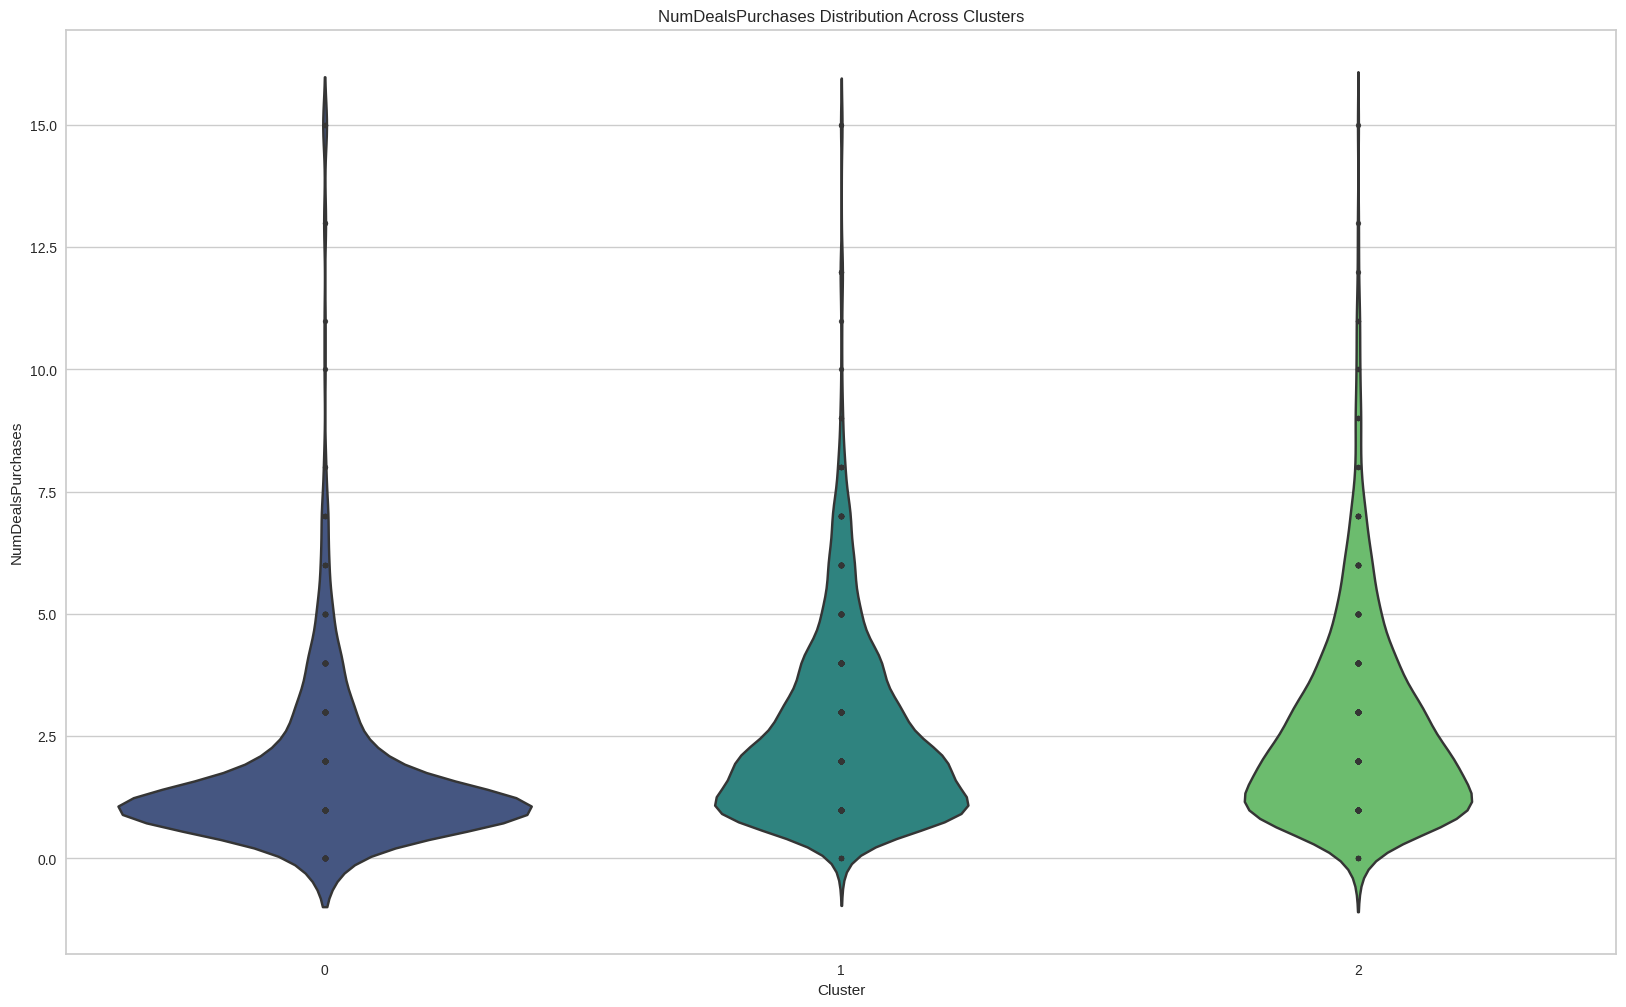

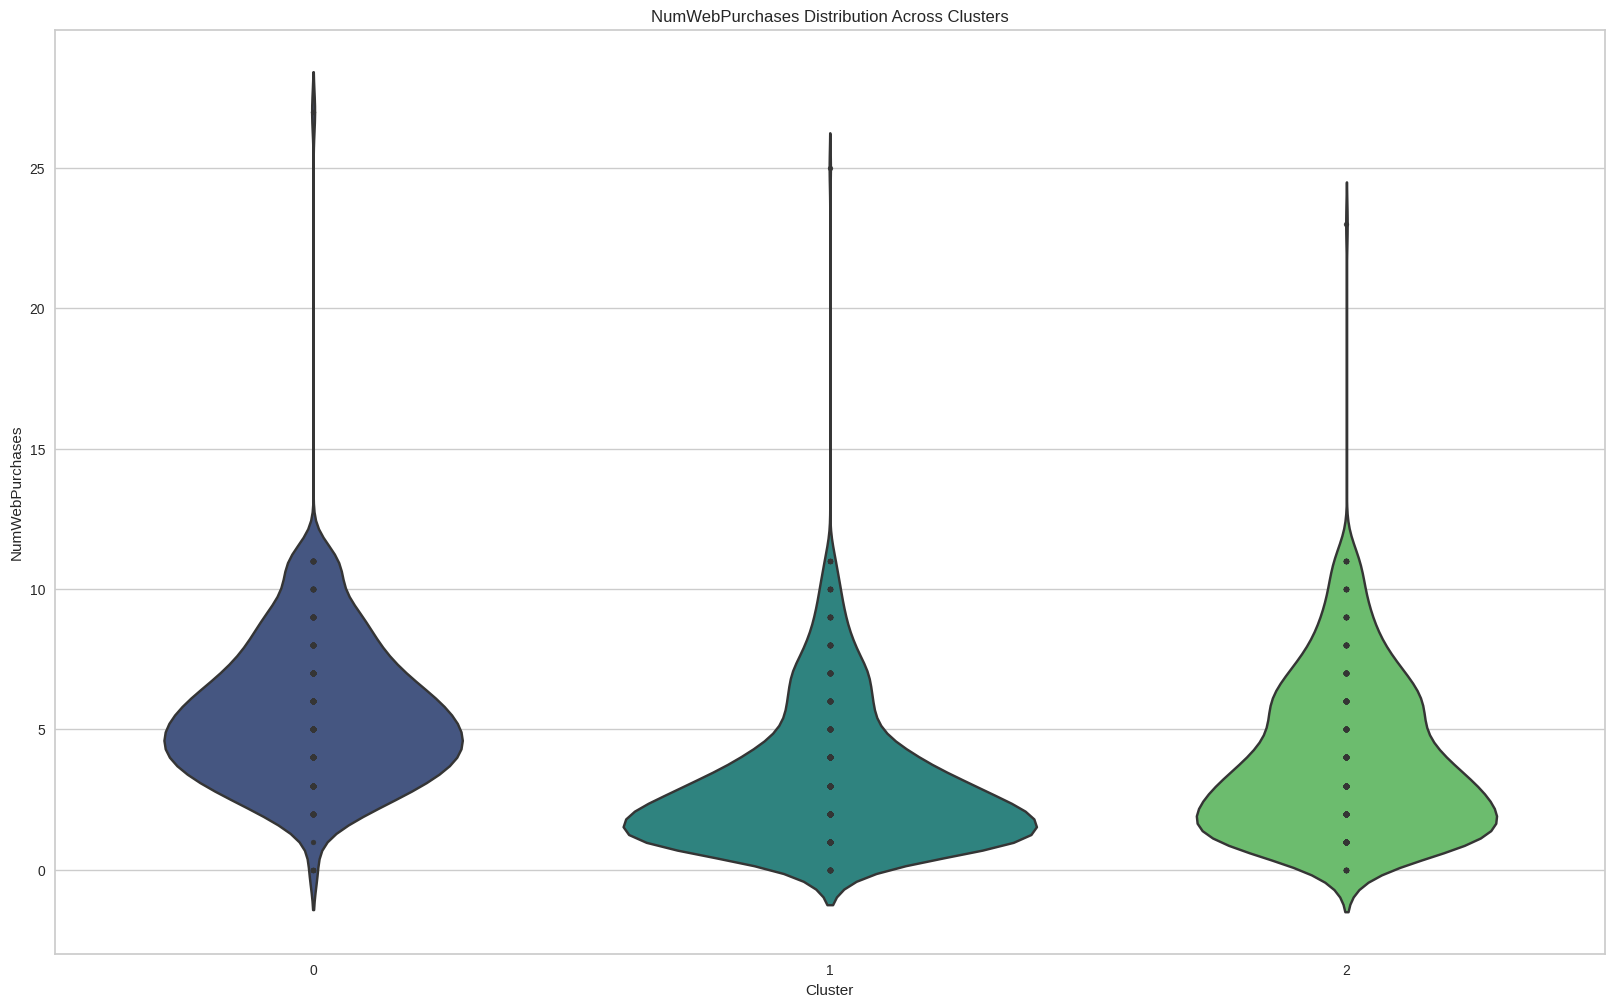

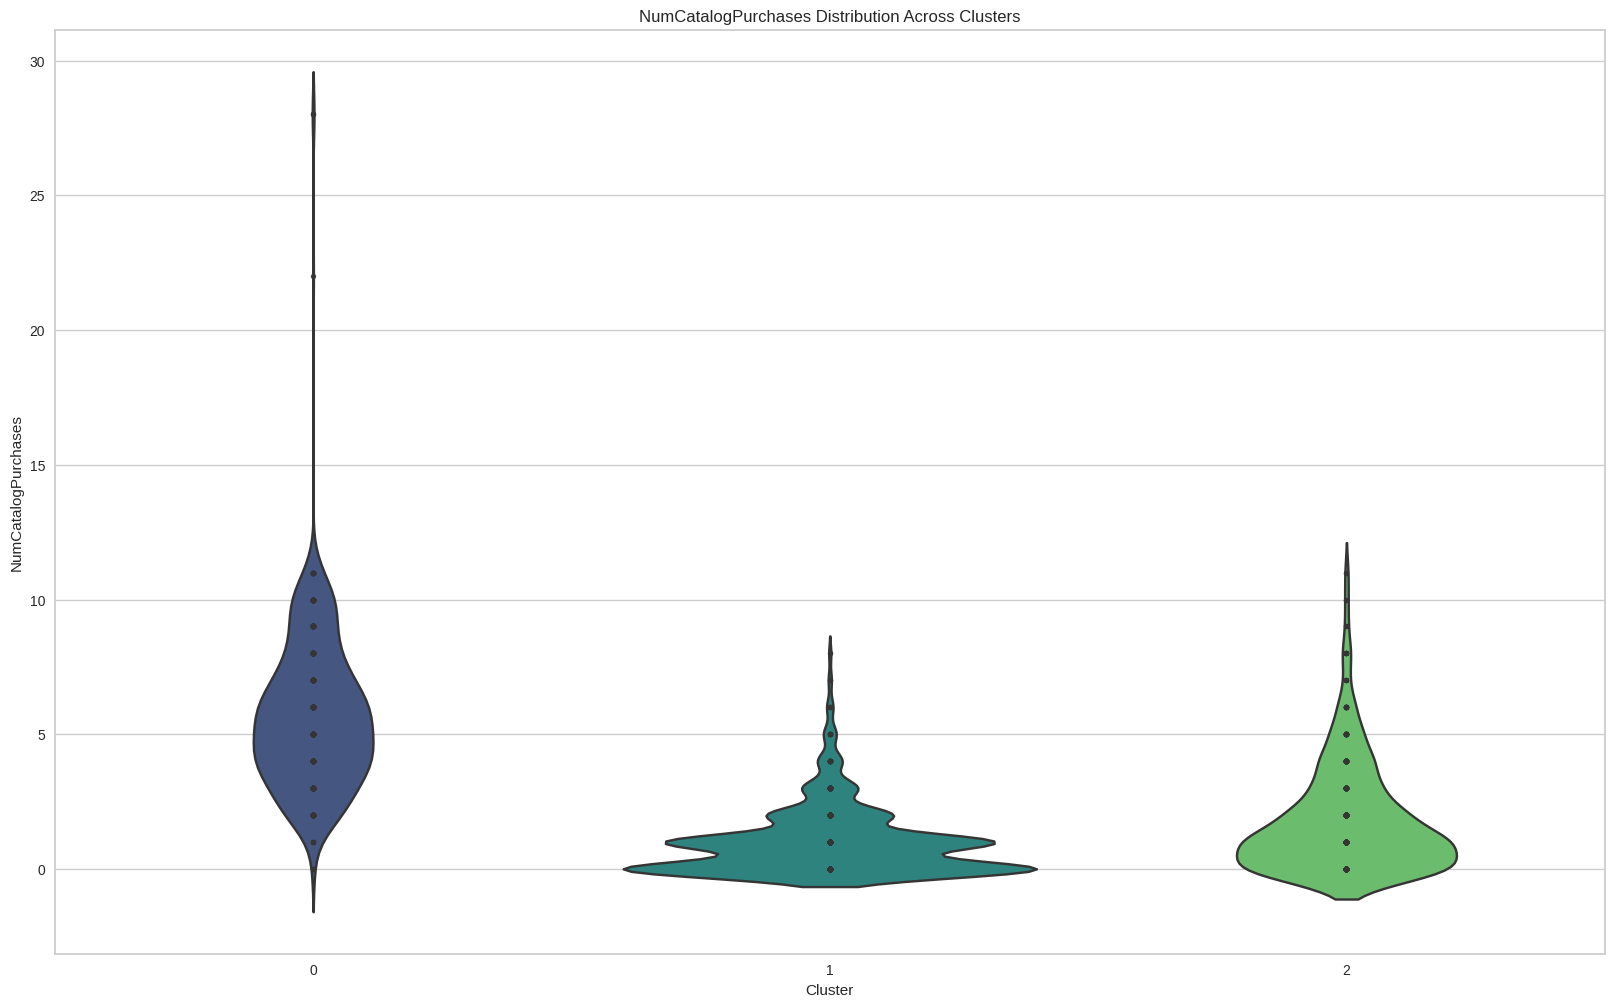

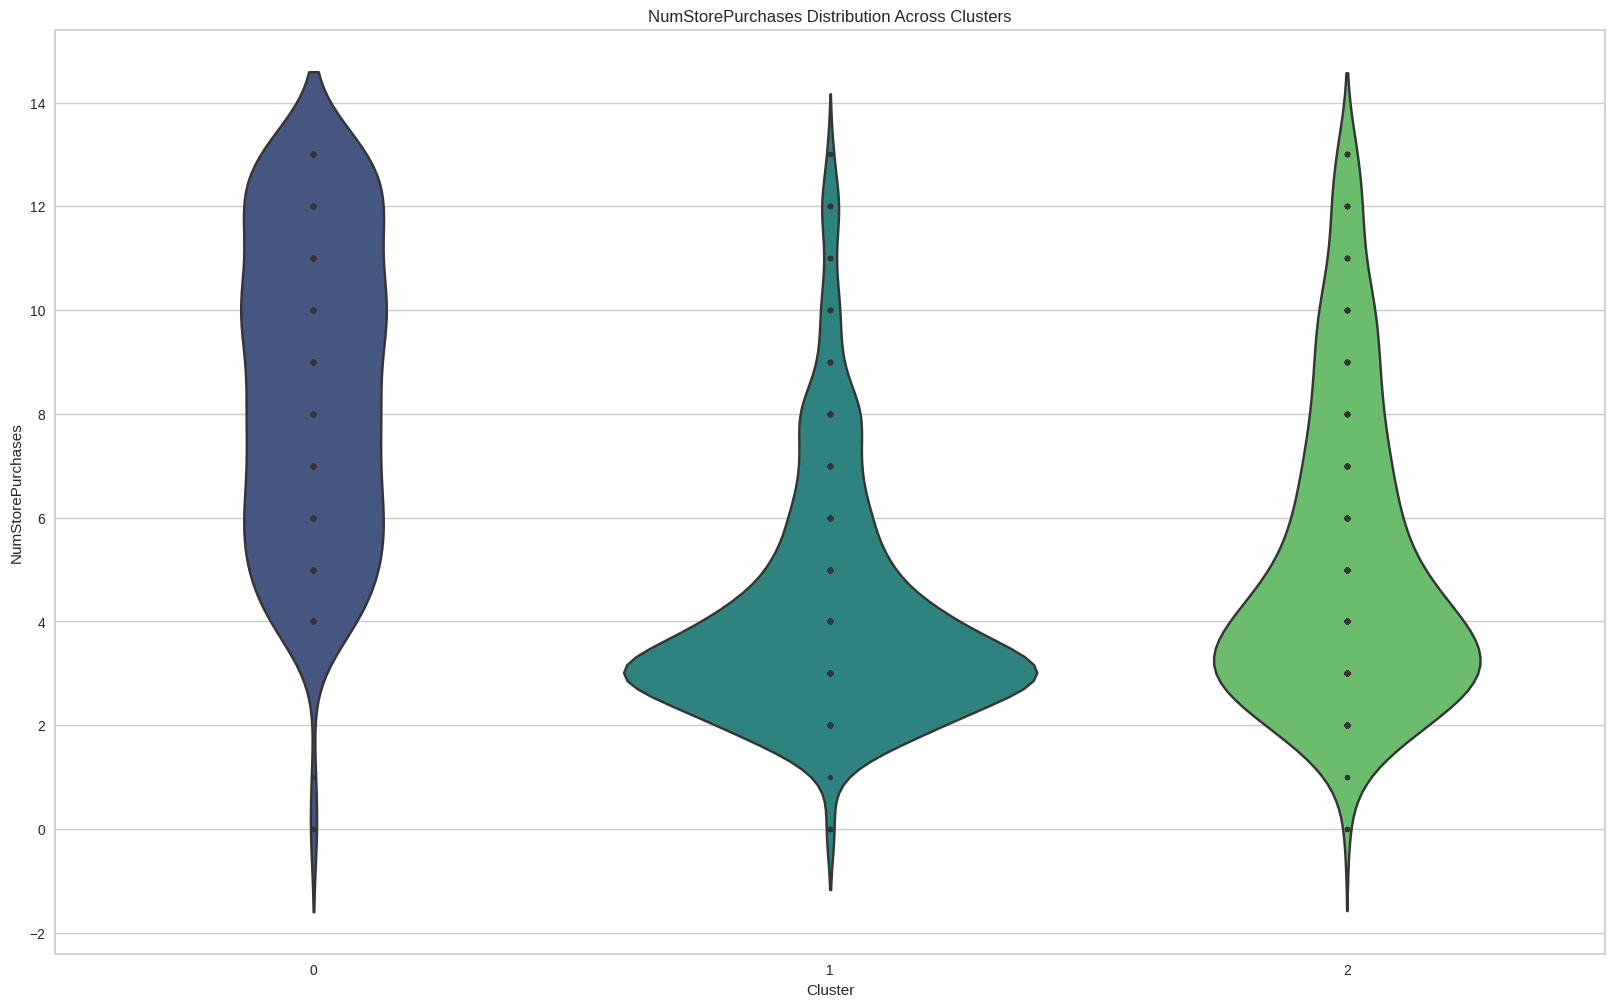

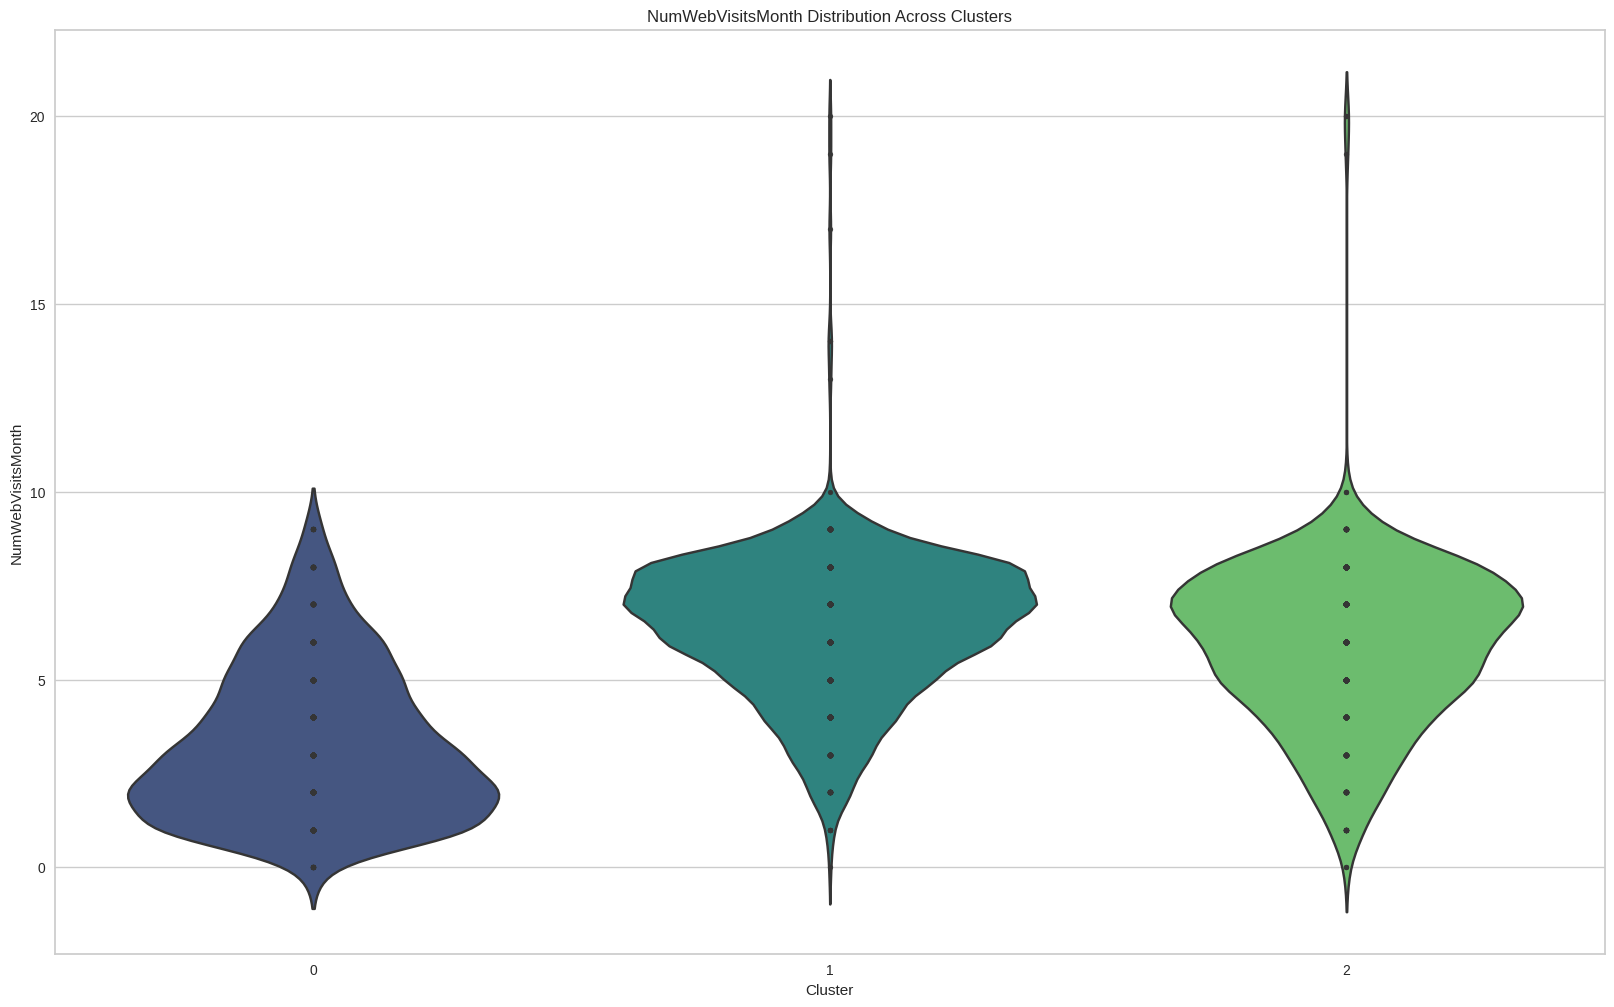

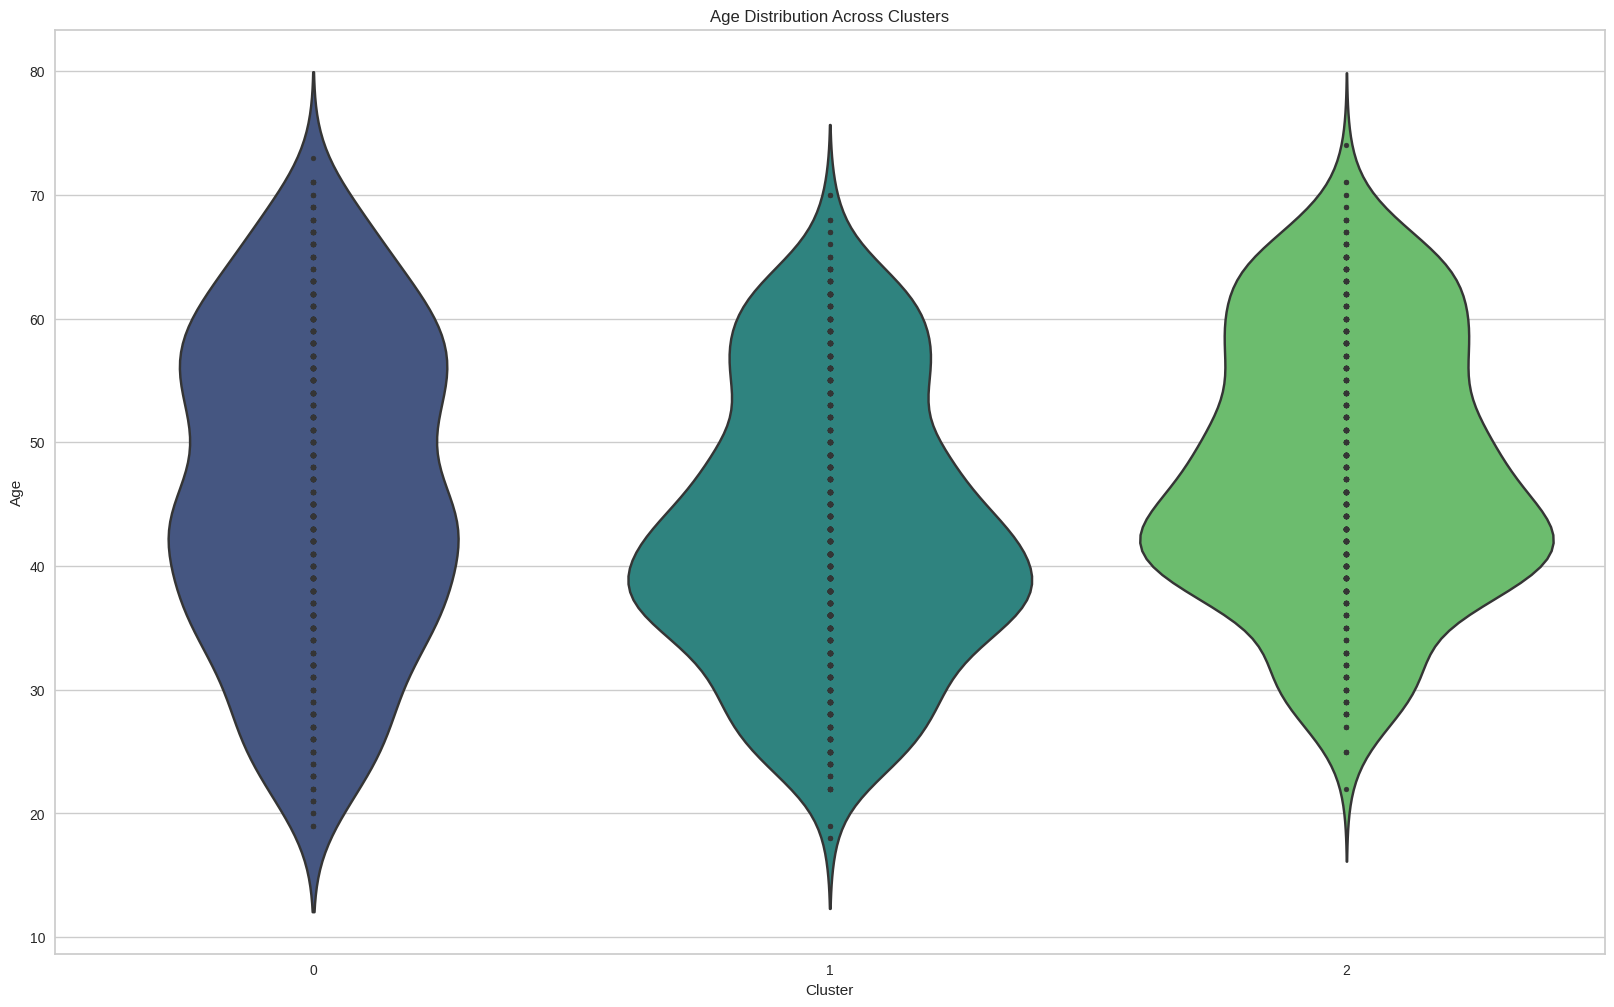

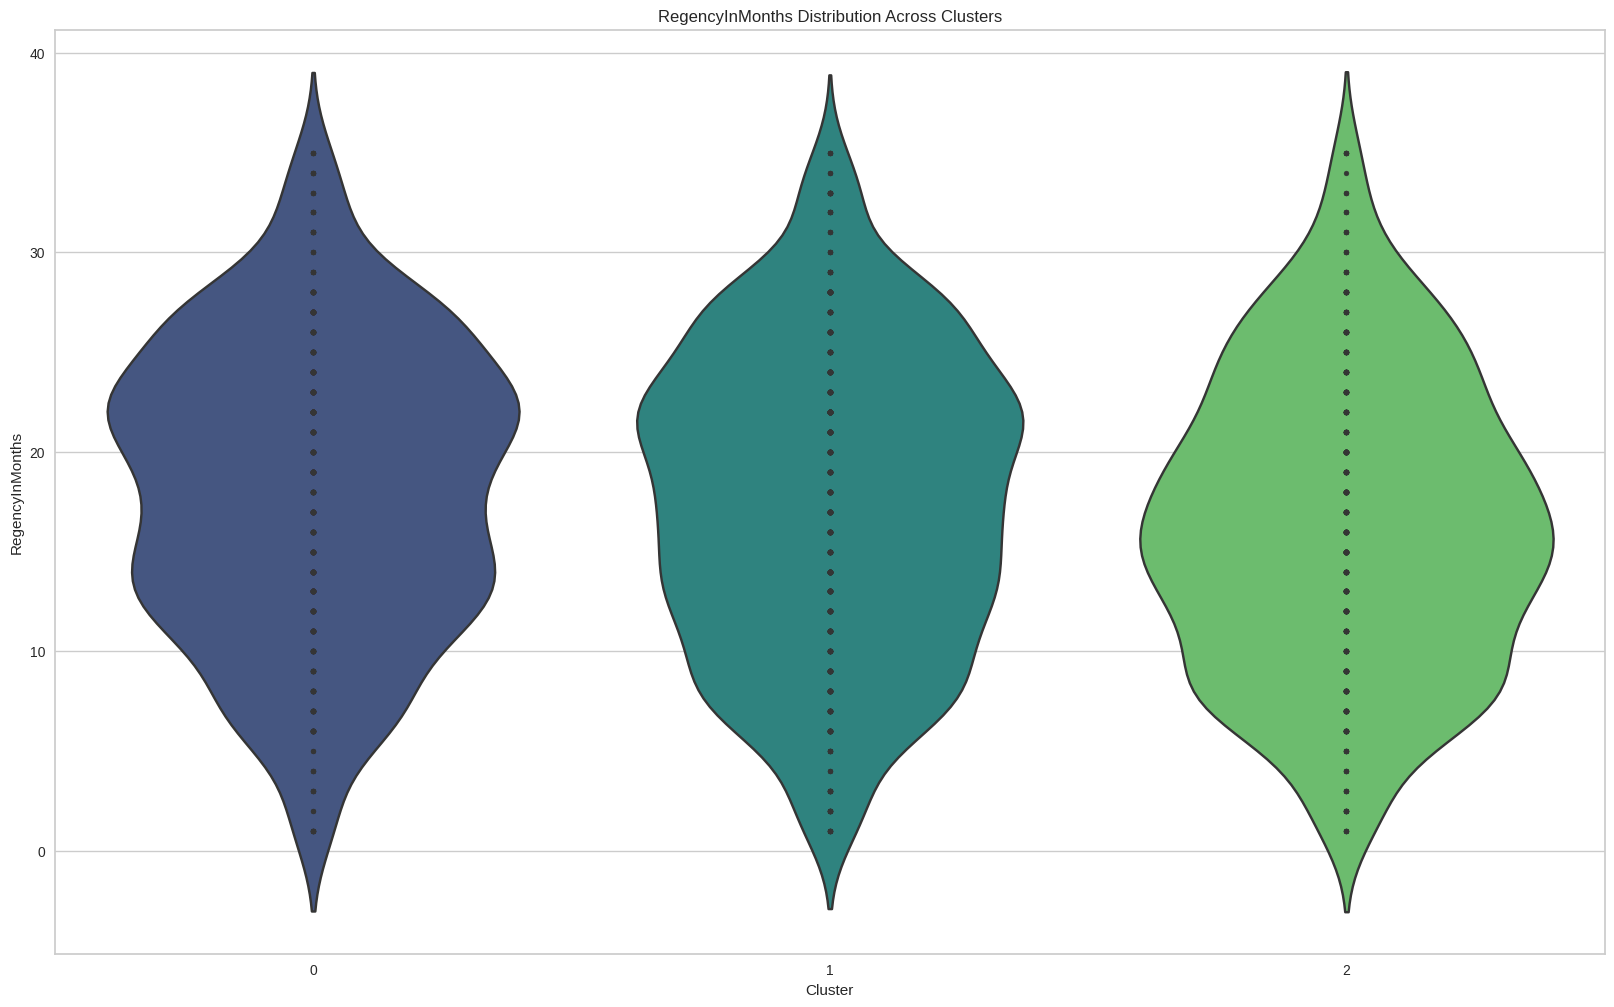

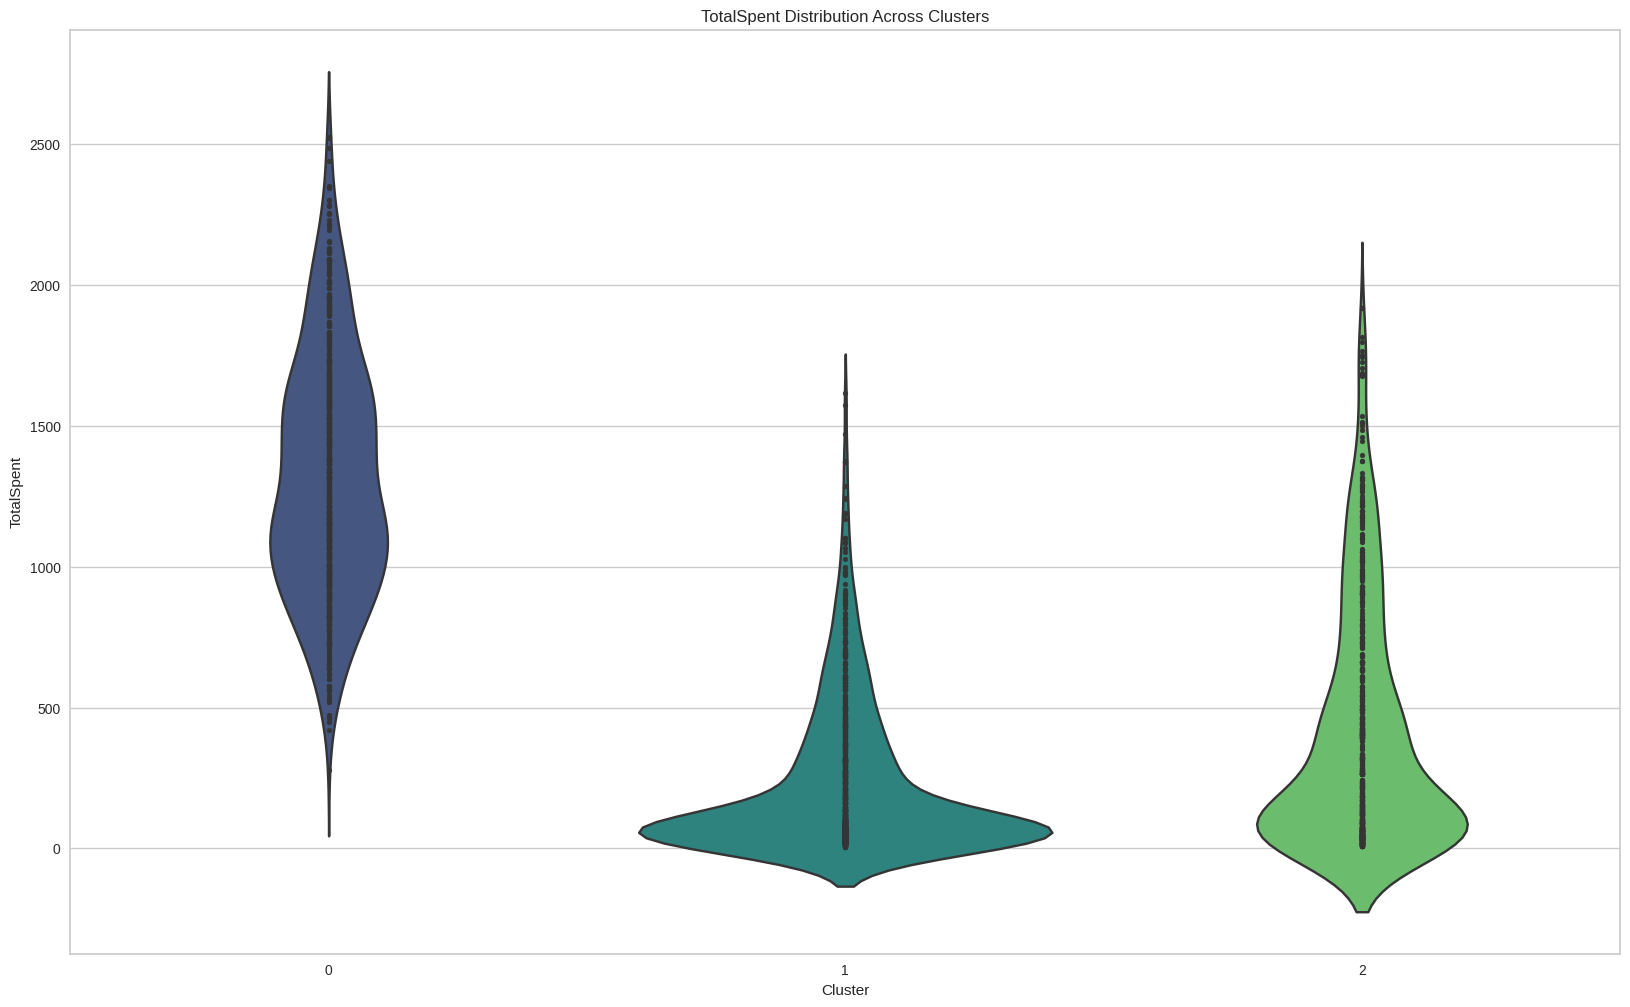

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_violin_by_cluster(df, columns, palette='viridis'):
    """
    Generate violin plots for each specified column, grouped by the 'cluster' column.

    Parameters:
    - df: pandas DataFrame, input data
    - columns: list of str, column names to plot
    - palette: str or seaborn color palette, optional, default is 'viridis'

    Returns:
    - None (plots the violin plots)
    """
    # Loop through each column and create a violin plot
    for column in columns:
        plt.figure(figsize=(20, 12))
        sns.violinplot(x='cluster', y=column, data=df, palette=palette, inner='points', color='red', edgecolor='black')
        plt.title(f'{column} Distribution Across Clusters')
        plt.xlabel('Cluster')
        plt.ylabel(column)
        plt.show()

# Assuming 'df' is your DataFrame and 'columns_to_plot' is a list of column names
columns_to_plot = continuous_features

# Use the function to plot violin plots for specified columns
plot_violin_by_cluster(df, columns_to_plot)


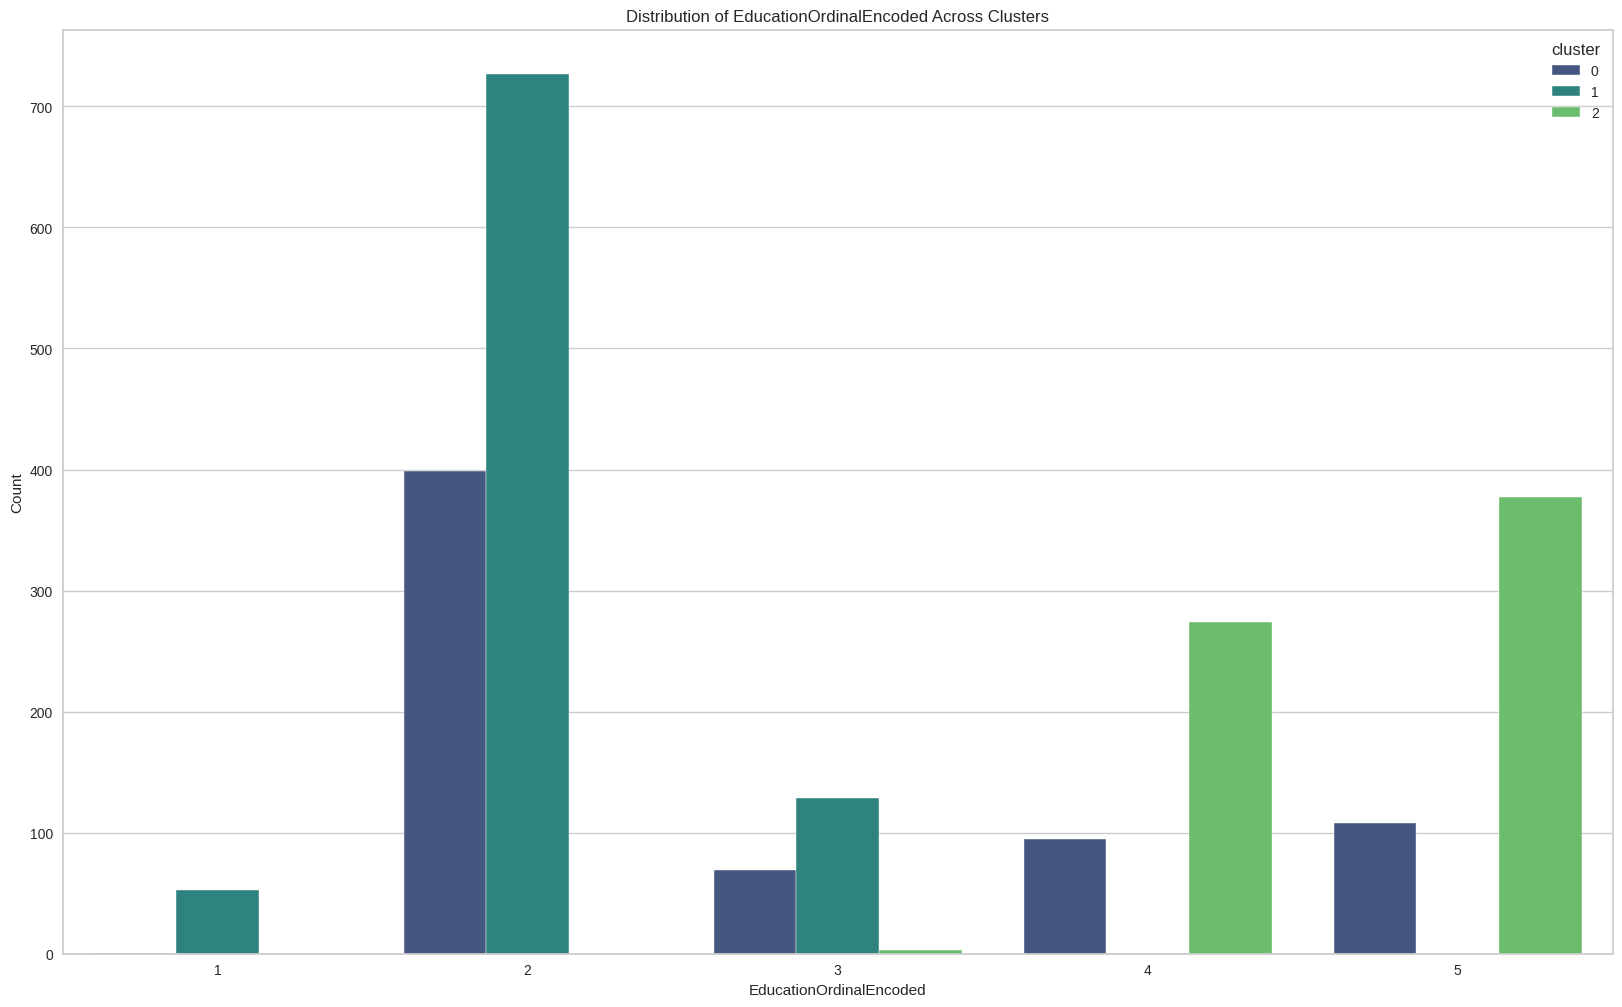

In [59]:
# Create a grouped bar chart using Seaborn's countplot
plt.figure(figsize=(20, 12))
sns.countplot(x='EducationOrdinalEncoded', hue='cluster', data=df, palette='viridis')
plt.title('Distribution of EducationOrdinalEncoded Across Clusters')
plt.xlabel('EducationOrdinalEncoded')
plt.ylabel('Count')
plt.show()

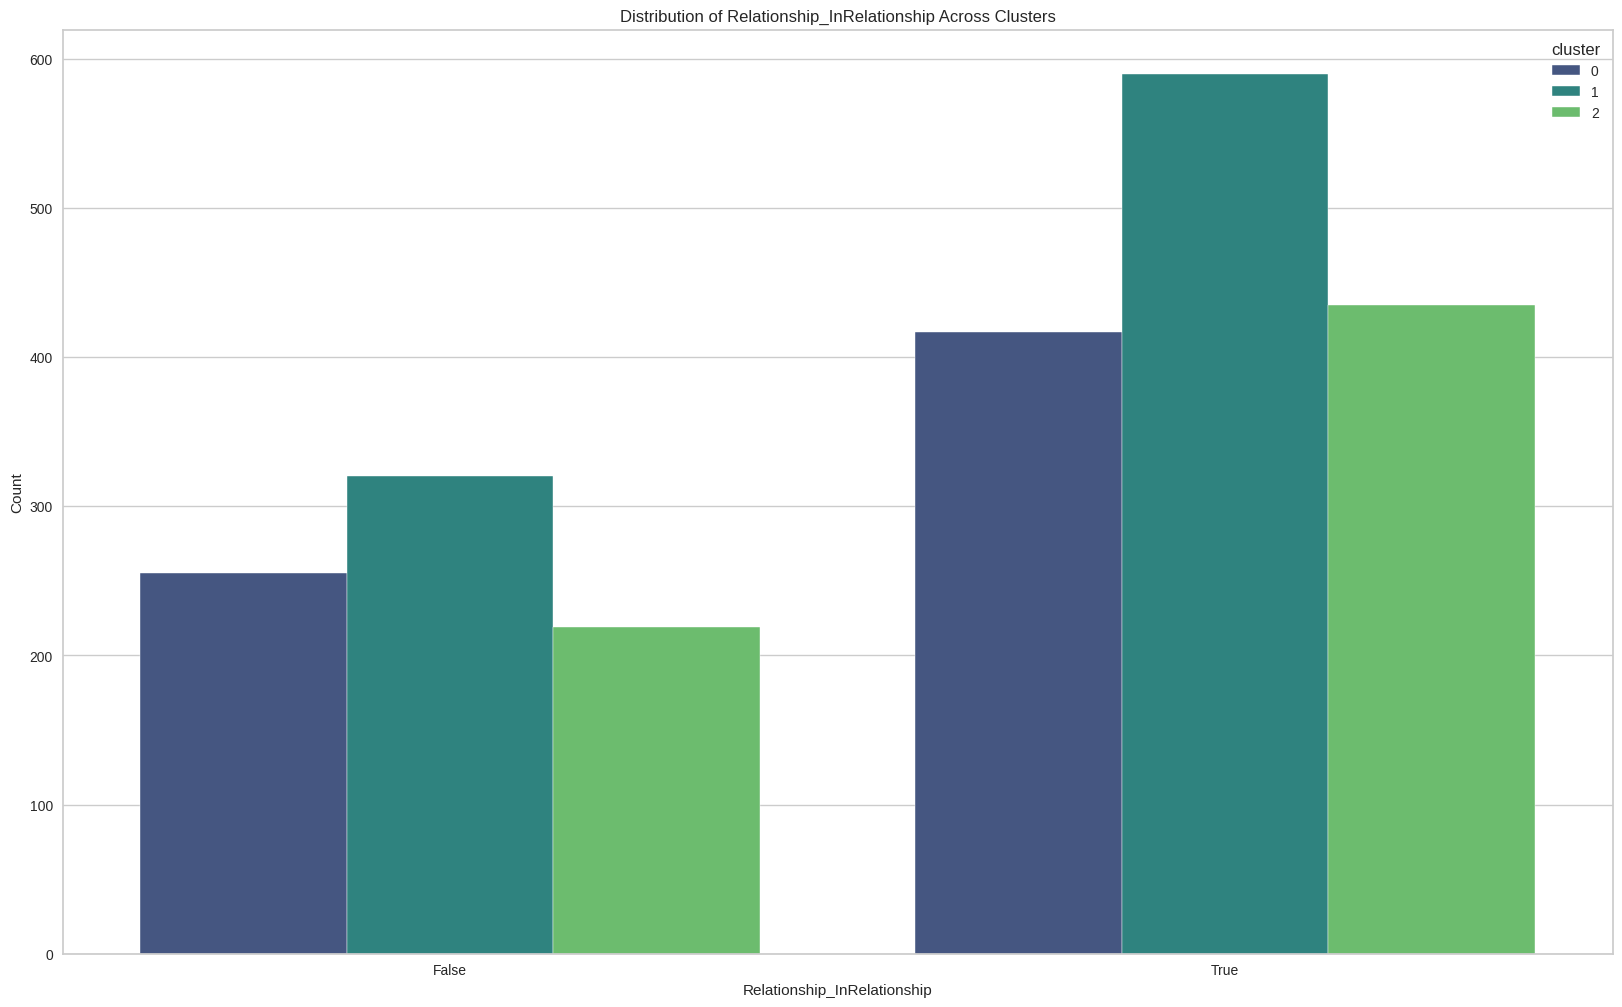

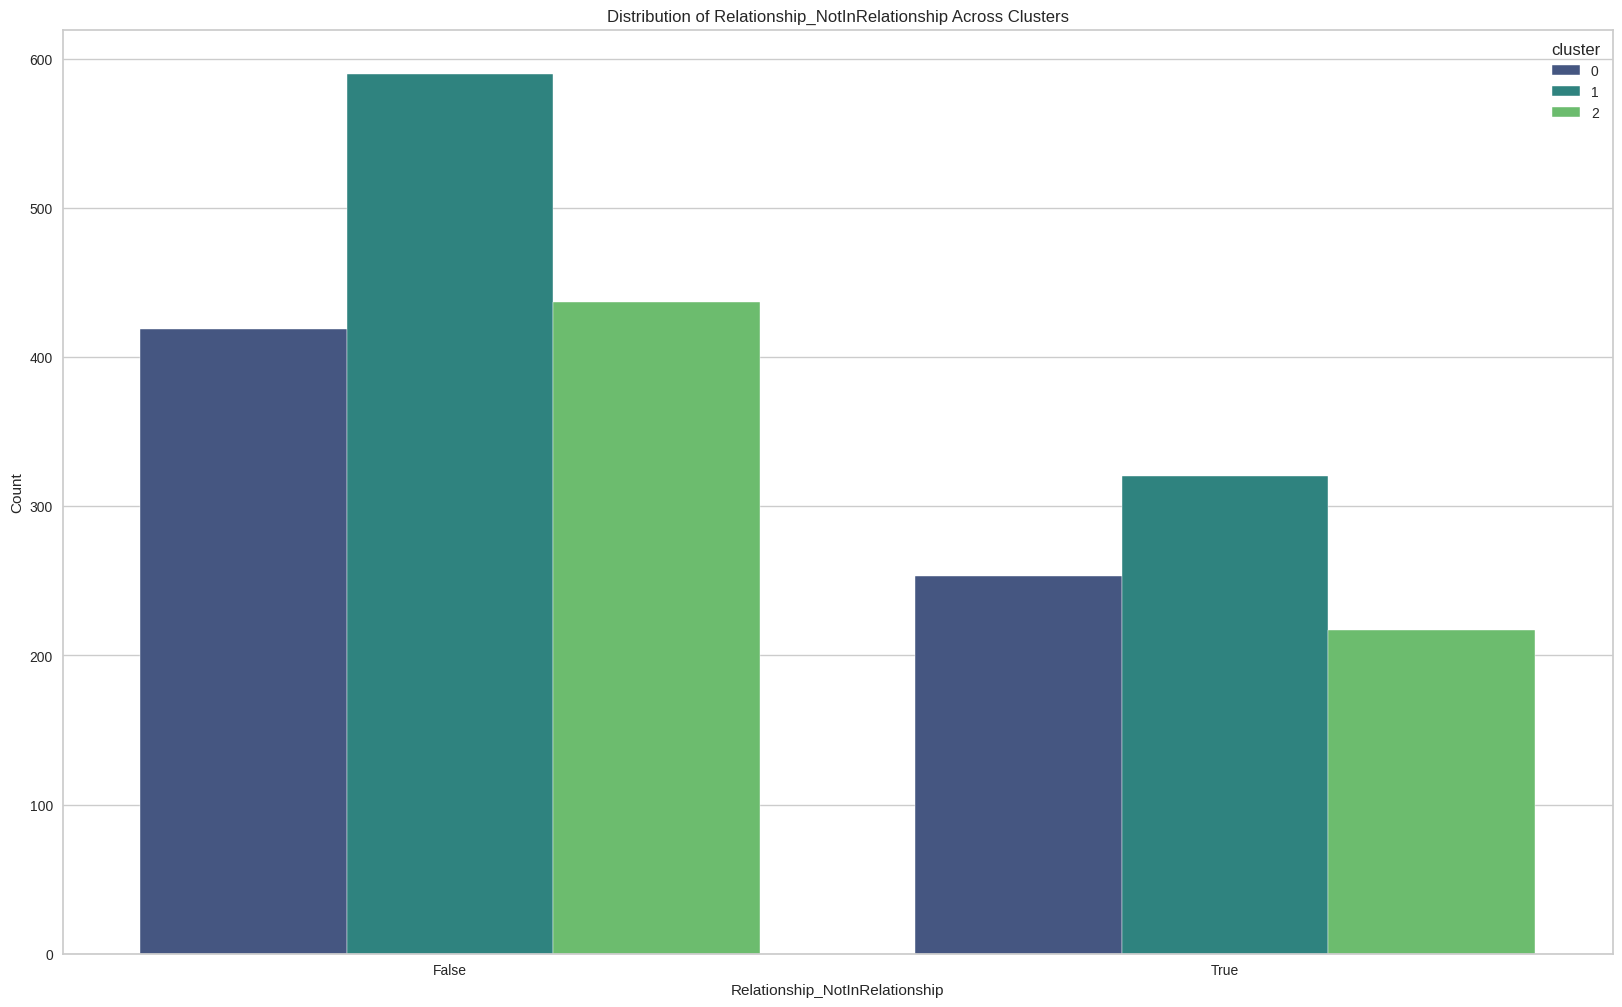

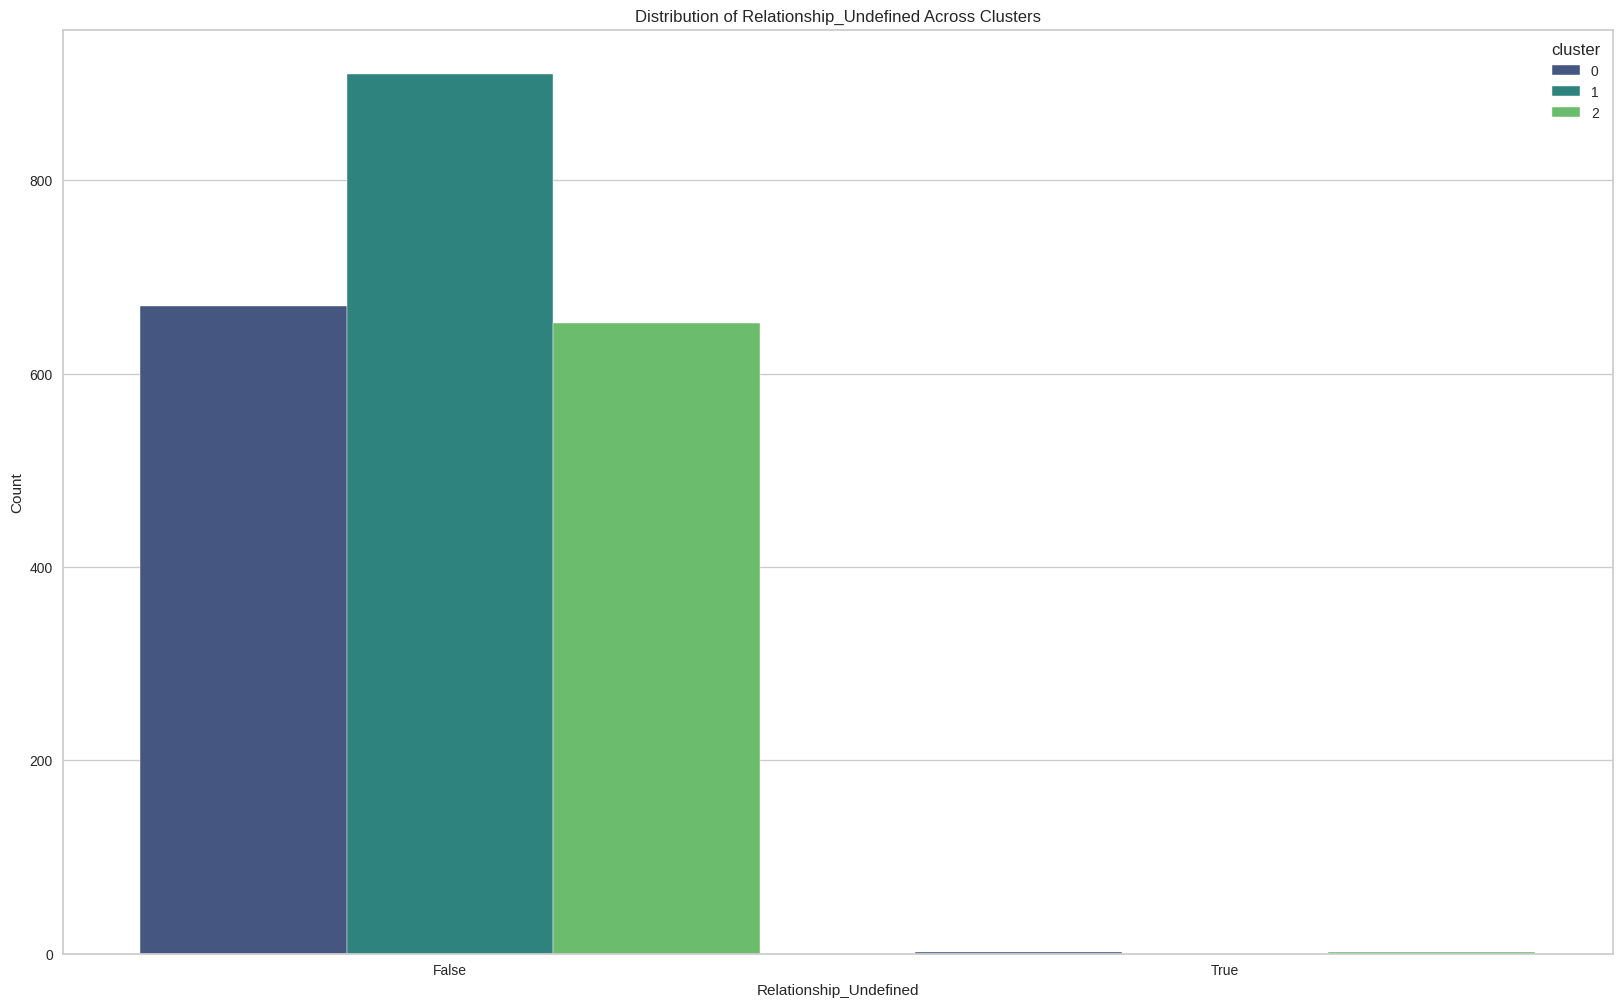

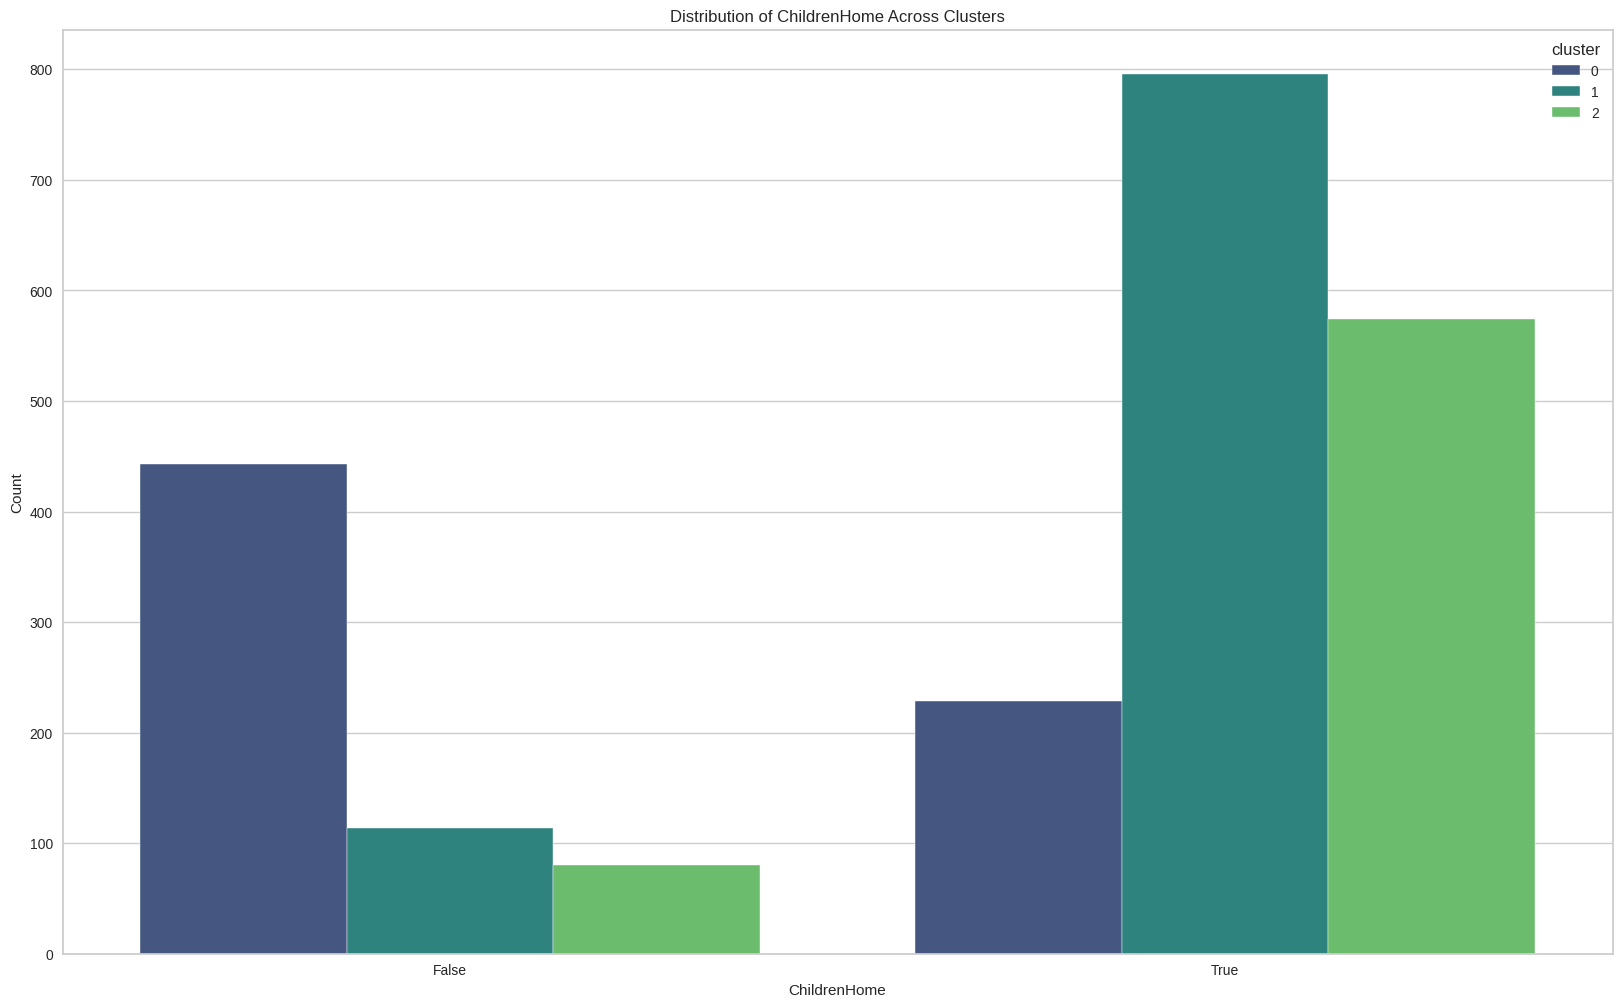

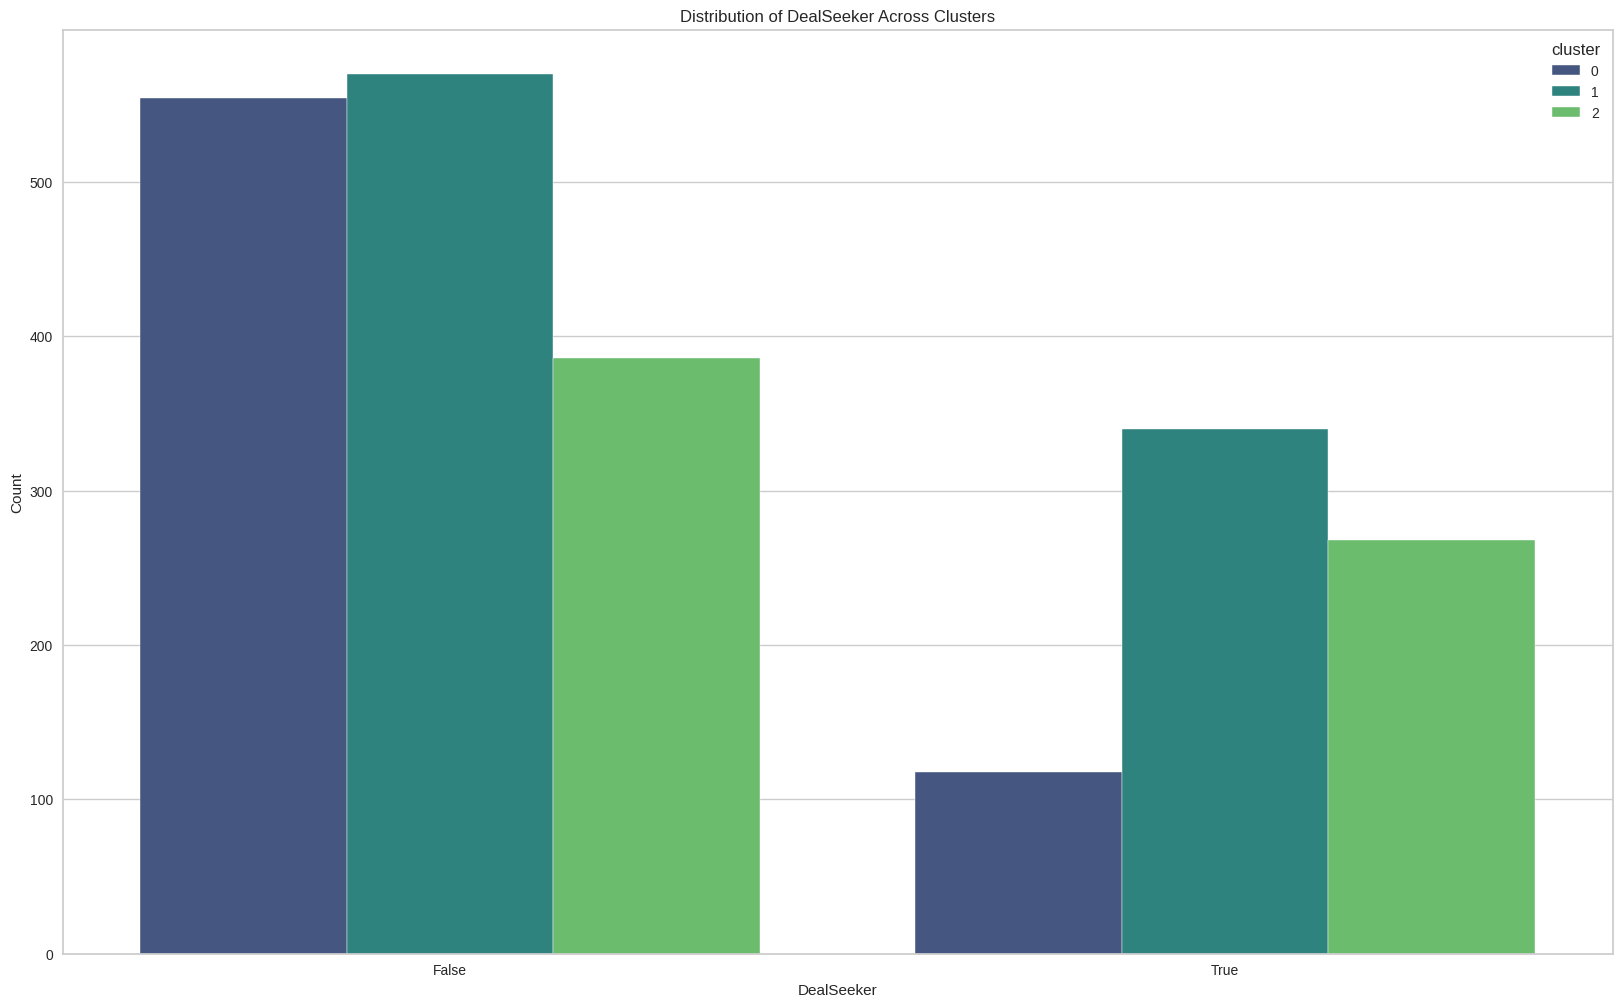

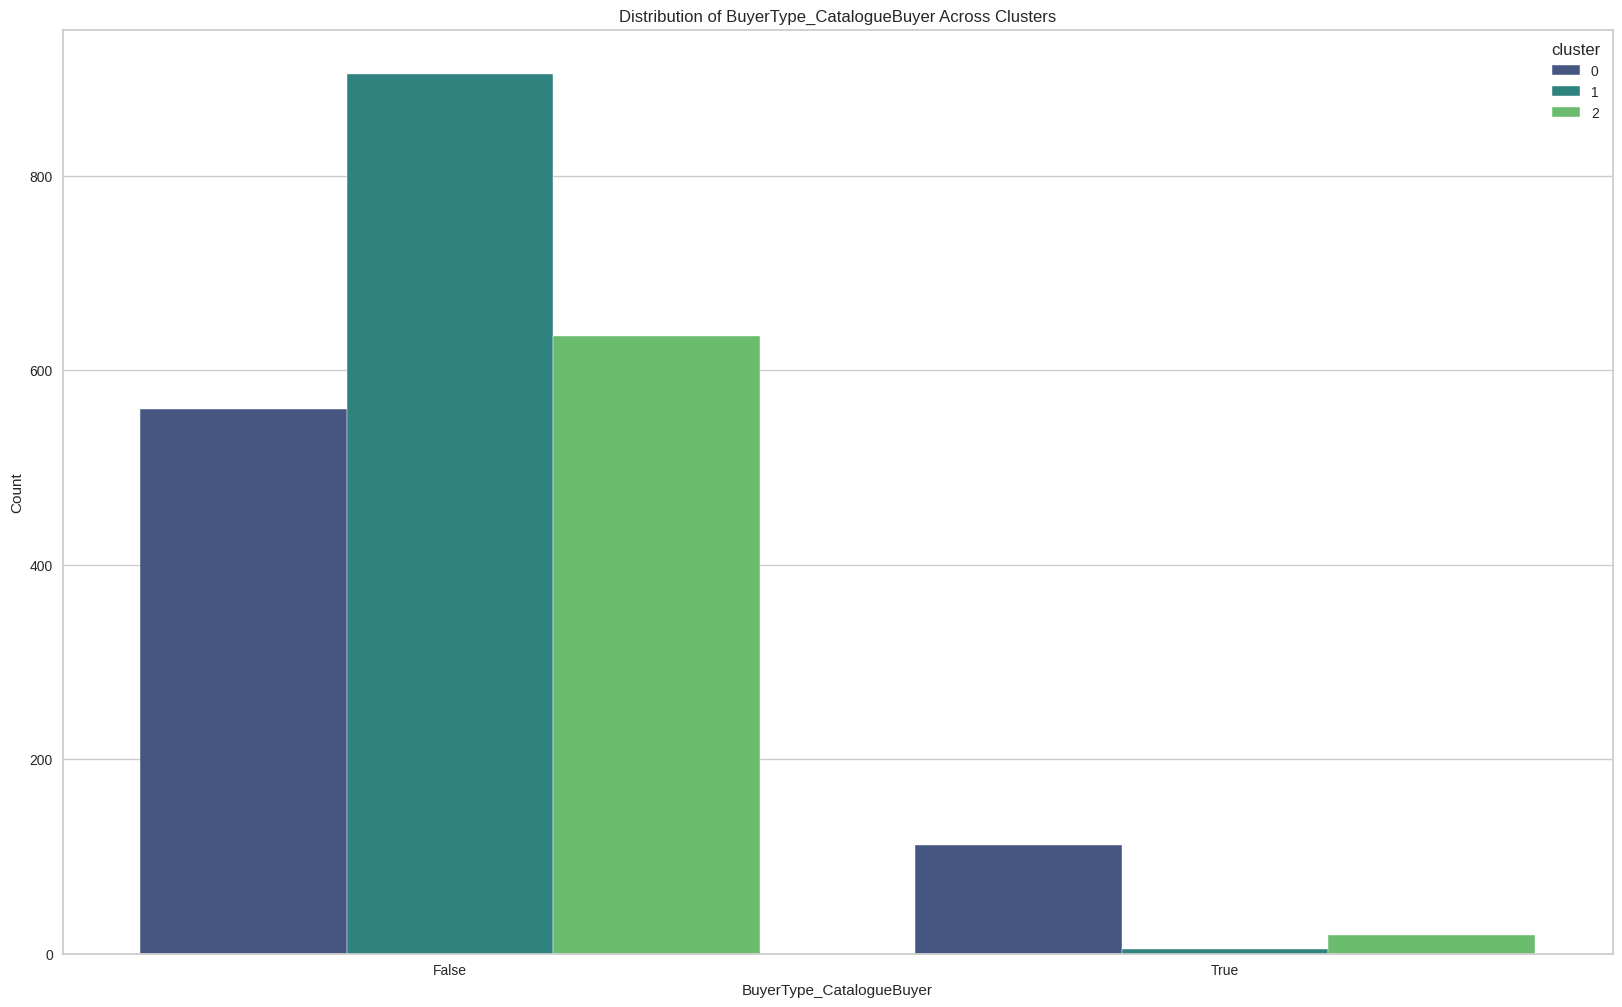

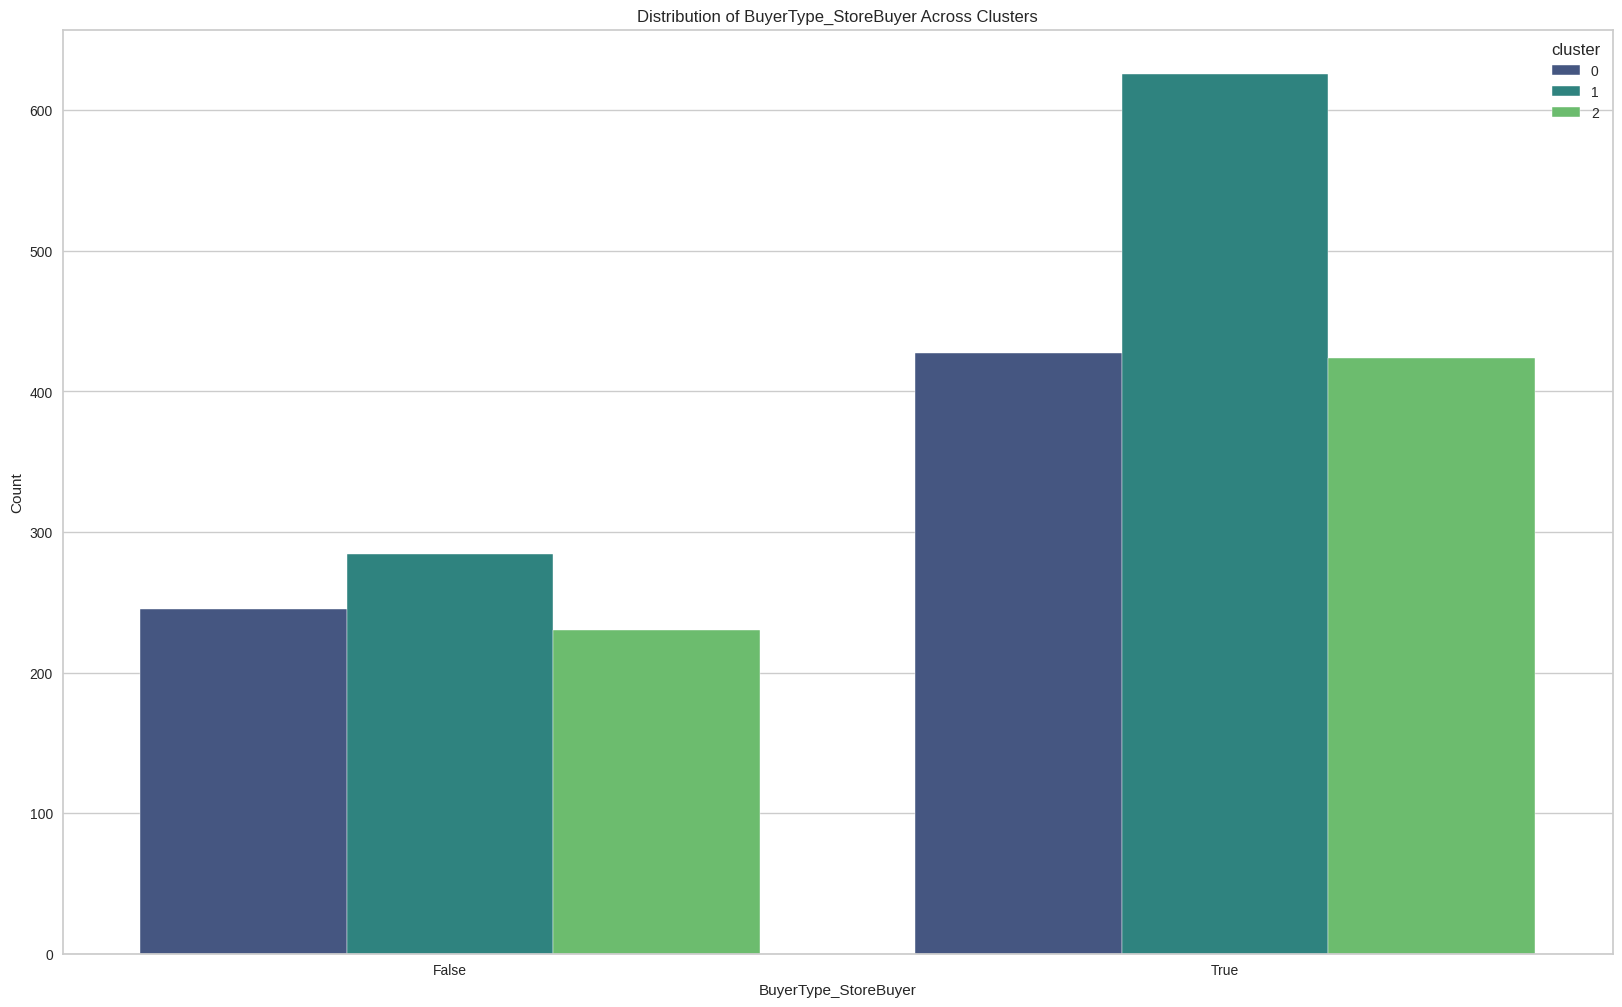

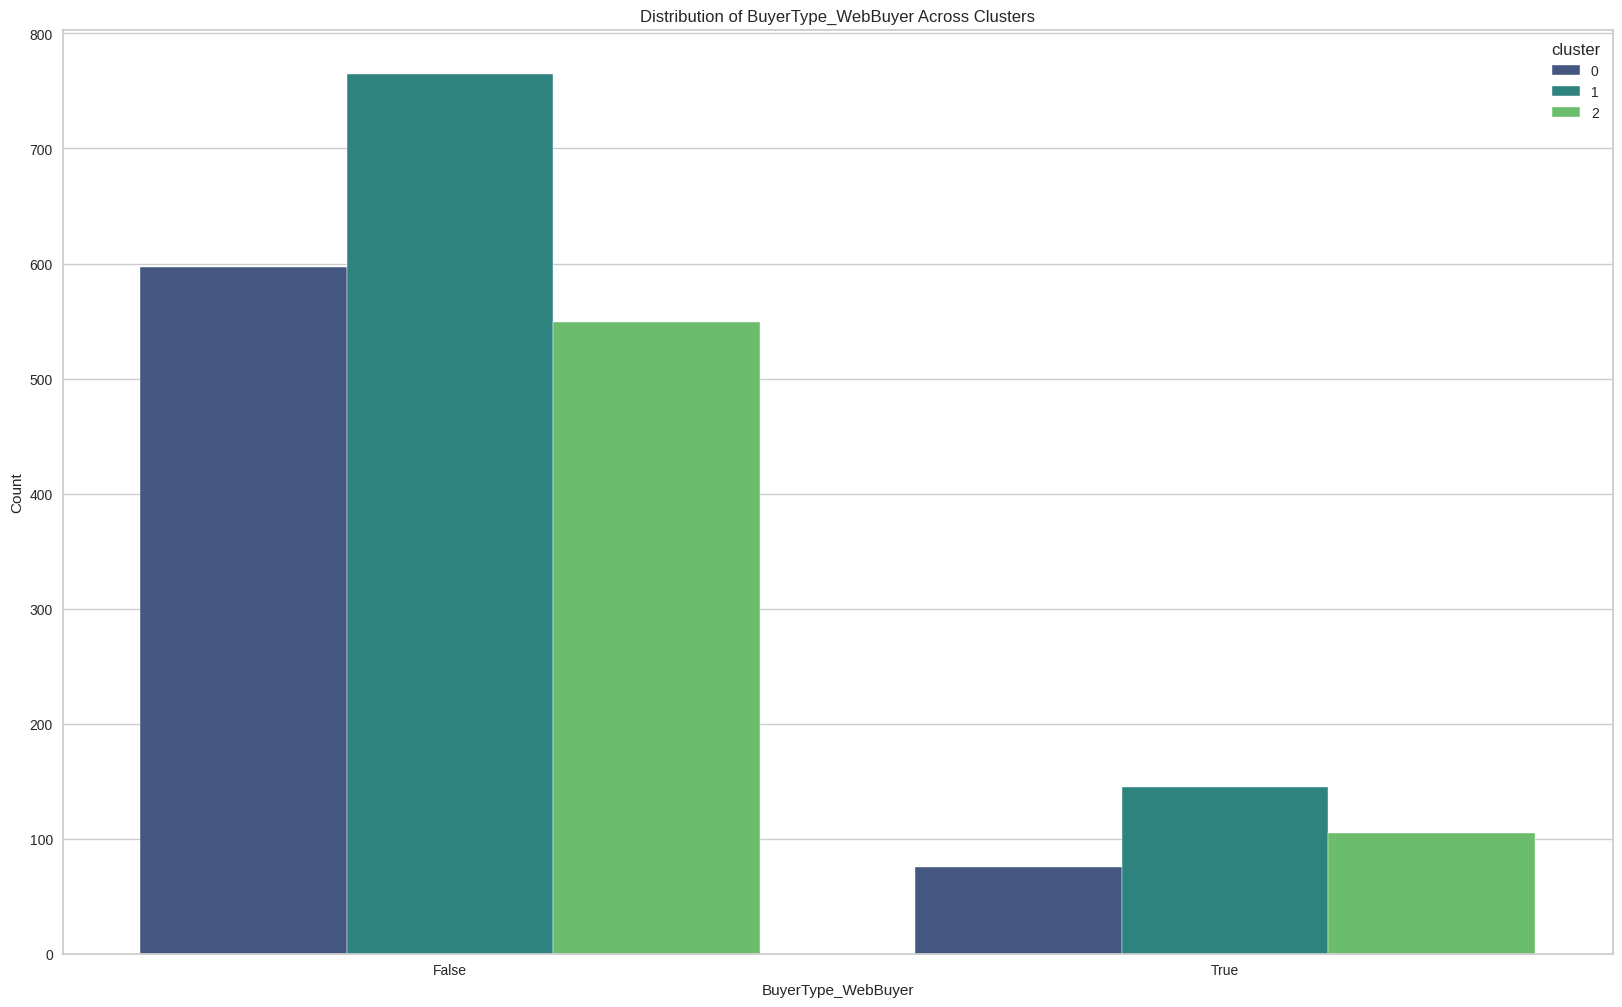

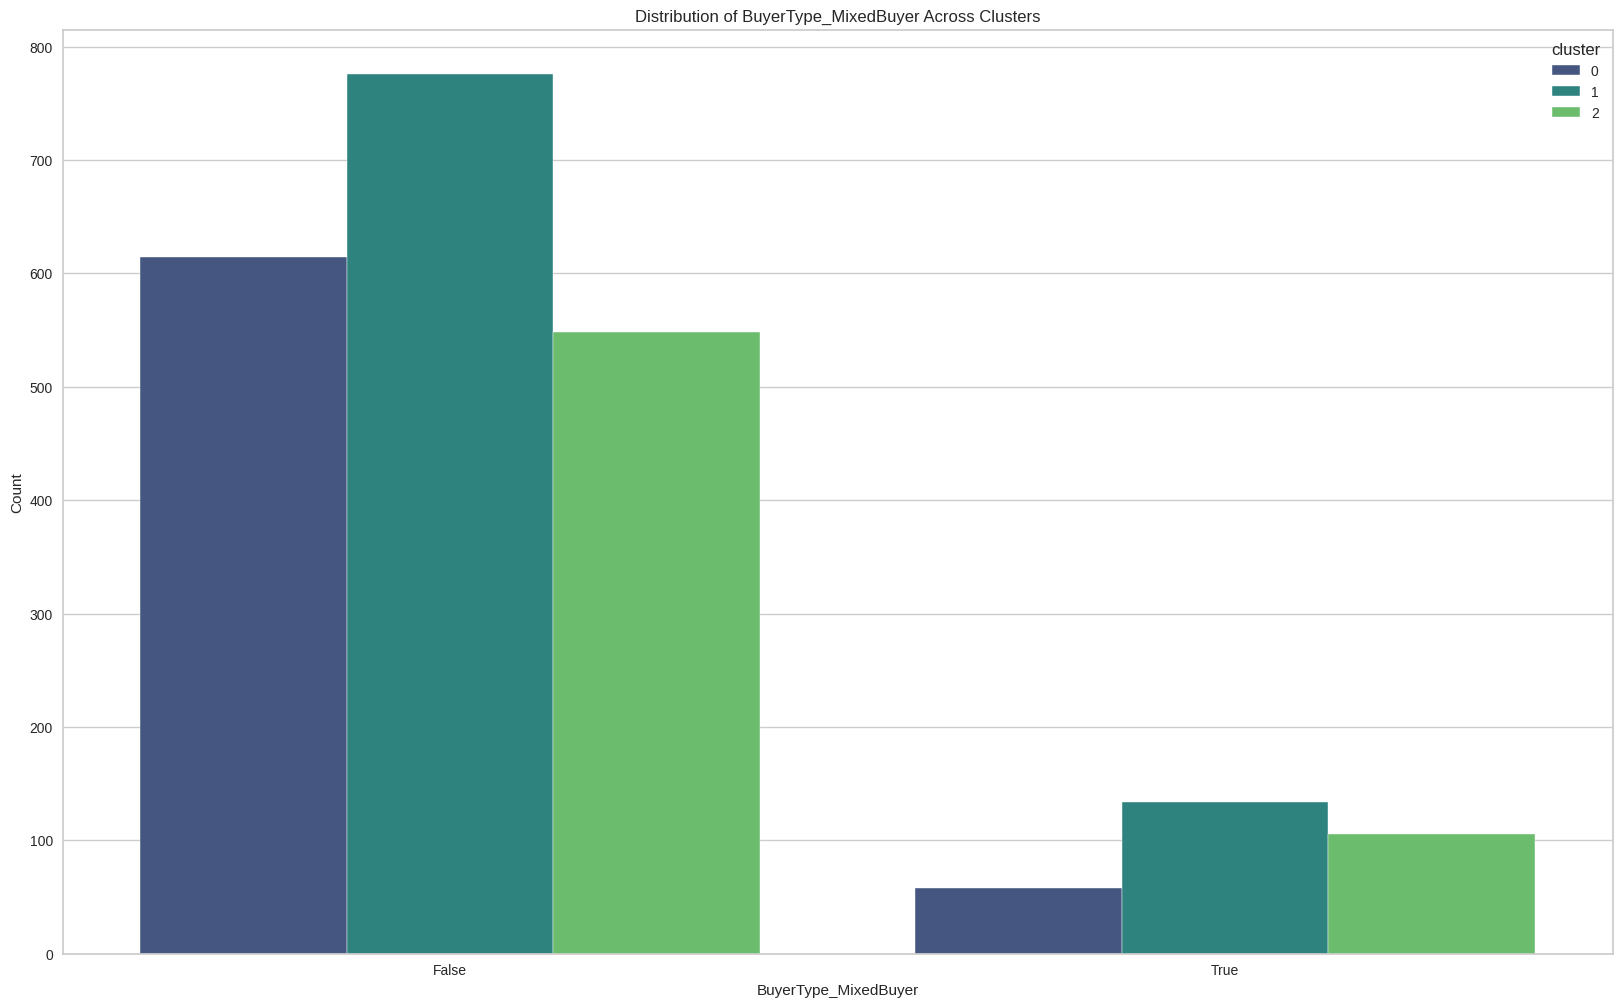

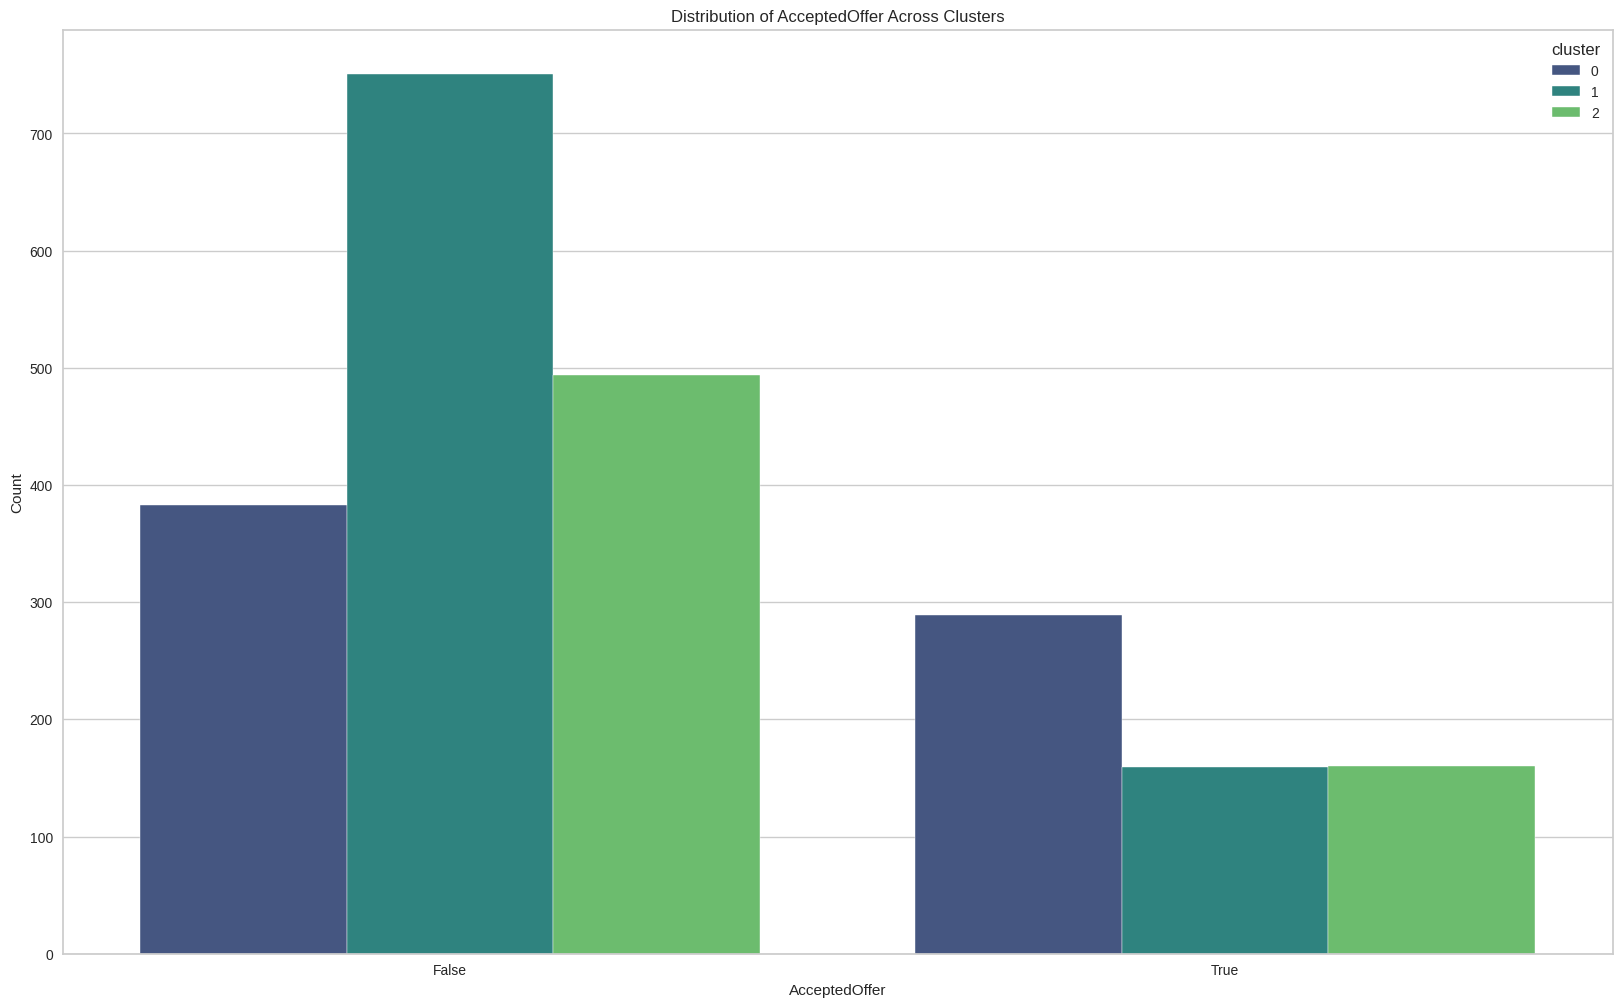

In [62]:
def plot_binary_counts_by_cluster(df, binary_columns, palette='viridis'):
    """
    Generate stacked bar charts for each specified binary column, grouped by the 'cluster' column.

    Parameters:
    - df: pandas DataFrame, input data
    - binary_columns: list of str, binary column names to plot
    - palette: str or seaborn color palette, optional, default is 'viridis'

    Returns:
    - None (plots the stacked bar charts)
    """
    # Verify unique values in the 'cluster' column
    unique_clusters = df['cluster'].unique()

    # Loop through each binary column and create a stacked bar chart
    for column in binary_columns:
        plt.figure(figsize=(20, 12))
        sns.countplot(x=column, hue='cluster', data=df, palette=palette, hue_order=unique_clusters)

        # Customize x-axis tick labels
        plt.xticks([0, 1], ['False', 'True'])

        plt.title(f'Distribution of {column} Across Clusters')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()


# Assuming 'df' is your DataFrame and 'binary_columns_to_plot' is a list of binary column names
binary_columns_to_plot = ['Relationship_InRelationship',
                          'Relationship_NotInRelationship',
                          'Relationship_Undefined',
                          'ChildrenHome',
                          'DealSeeker',
                          'BuyerType_CatalogueBuyer',
                          'BuyerType_StoreBuyer',
                          'BuyerType_WebBuyer',
                          'BuyerType_MixedBuyer',
                          'AcceptedOffer']

# Use the function to plot stacked bar charts for specified binary columns
plot_binary_counts_by_cluster(df, binary_columns_to_plot)
